## Data analysis and visualization of full ensemble simulations across the gradient

By Bin Wang([@bioatmo_spere](https://twitter.com/bioatmo_sphere)|wbwenwu@gmail.com)

ORNL & UC Irvine

06/09/2021

---

Full reciprocal simulation with an ensemble of 20 runs for each "treatment" (5 * 5 = 25 treaments in total and 25 * 20=500 runs in total).

- 1) confidence interval function

- 2) substrates

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
from scipy import stats
from sklearn.metrics import r2_score
from scipy.optimize import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print("scipy version:",scipy.__version__)
print('matplotlib version:',  matplotlib.__version__)

pandas version: 1.2.2
numpy version: 1.19.2
scipy version: 1.6.2
matplotlib version: 3.3.4


### common functions

In [2]:
def confi_interval(df, alpha=0.05):
    #alpha = 0.05
    
    lower = df.apply(
        lambda df: df.mean() - (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1
    )
    upper = df.apply(lambda df: df.mean() + (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1)
    
    return lower,upper

### data: substrates

In [3]:
sub_de_de = pd.read_csv('desert/Sub_desert_desert.csv',      index_col=0)/10000
sub_sc_de = pd.read_csv('scrubland/Sub_scrubland_desert.csv',index_col=0)/10000
sub_gr_de = pd.read_csv('grassland/Sub_grassland_desert.csv',index_col=0)/10000
sub_pi_de = pd.read_csv('pineoak/Sub_pineoak_desert.csv',    index_col=0)/10000
sub_su_de = pd.read_csv('subalpine/Sub_subalpine_desert.csv',index_col=0)/10000


sub_de_sc = pd.read_csv('desert/Sub_desert_scrubland.csv',      index_col=0)/10000
sub_sc_sc = pd.read_csv('scrubland/Sub_scrubland_scrubland.csv',index_col=0)/10000
sub_gr_sc = pd.read_csv('grassland/Sub_grassland_scrubland.csv',index_col=0)/10000
sub_pi_sc = pd.read_csv('pineoak/Sub_pineoak_scrubland.csv',    index_col=0)/10000
sub_su_sc = pd.read_csv('subalpine/Sub_subalpine_scrubland.csv',index_col=0)/10000


sub_de_gr = pd.read_csv('desert/Sub_desert_grassland.csv',      index_col=0)/10000
sub_sc_gr = pd.read_csv('scrubland/Sub_scrubland_grassland.csv',index_col=0)/10000
sub_gr_gr = pd.read_csv('grassland/Sub_grassland_grassland.csv',index_col=0)/10000
sub_pi_gr = pd.read_csv('pineoak/Sub_pineoak_grassland.csv',    index_col=0)/10000
sub_su_gr = pd.read_csv('subalpine/Sub_subalpine_grassland.csv',index_col=0)/10000


sub_de_pi = pd.read_csv('desert/Sub_desert_pineoak.csv',      index_col=0)/10000
sub_sc_pi = pd.read_csv('scrubland/Sub_scrubland_pineoak.csv',index_col=0)/10000
sub_gr_pi = pd.read_csv('grassland/Sub_grassland_pineoak.csv',index_col=0)/10000
sub_pi_pi = pd.read_csv('pineoak/Sub_pineoak_pineoak.csv',    index_col=0)/10000
sub_su_pi = pd.read_csv('subalpine/Sub_subalpine_pineoak.csv',index_col=0)/10000


sub_de_su = pd.read_csv('desert/Sub_desert_subalpine.csv',      index_col=0)/10000
sub_sc_su = pd.read_csv('scrubland/Sub_scrubland_subalpine.csv',index_col=0)/10000
sub_gr_su = pd.read_csv('grassland/Sub_grassland_subalpine.csv',index_col=0)/10000
sub_pi_su = pd.read_csv('pineoak/Sub_pineoak_subalpine.csv',    index_col=0)/10000
sub_su_su = pd.read_csv('subalpine/Sub_subalpine_subalpine.csv',index_col=0)/10000

In [4]:
def plot_function(ax,
                  sub_de_de, sub_sc_de, sub_gr_de, sub_pi_de, sub_su_de,
                  year,
                  alpha = 0.10,
                  xlabel= False,
                  ylabel= False):
    """
    Plot a site with specified time period.
    
    Parameters:
      ax:
      year:
      alpha:  confidence level
      xlabel: how to handle xaxis label
      ylabel: how to handle yaxis label
    """
    
    lb = year*365+1
    ub = (year+1)*365+1
    
    ## confidence interval
    sub_de_de_bound   = confi_interval(sub_de_de.iloc[:,:],alpha)
    sub_sc_de_bound   = confi_interval(sub_sc_de.iloc[:,:],alpha)
    sub_gr_de_bound   = confi_interval(sub_gr_de.iloc[:,:],alpha)
    sub_pi_de_bound   = confi_interval(sub_pi_de.iloc[:,:],alpha)
    sub_su_de_bound   = confi_interval(sub_su_de.iloc[:,:],alpha)
    
    
    #ax.set_xlabel('Day',size=14)
    ax.tick_params(bottom=False,labelbottom=False)
    ax.set_ylim(0,350)
    if xlabel == True:
        if ax == ax9:
            ax.set_xlabel('Year-1',size=14)
        if ax == ax10:
            ax.set_xlabel('Year-4',size=14)
    if ylabel == True:
        ax.yaxis.set_tick_params(labelsize=14,labelleft=True)
    else:
        ax.yaxis.set_tick_params(labelsize=14,labelleft=False)
        

    ax.plot(sub_de_de.mean(axis=1).iloc[lb:ub],color='red',linestyle='-')
    ax.fill_between(x=sub_de_de.index[lb:ub],y1=sub_de_de_bound[0][lb:ub],y2=sub_de_de_bound[1][lb:ub], facecolor='red',alpha=0.5)

    ax.plot(sub_sc_de.mean(axis=1).iloc[lb:ub],color='orange',linestyle='-')
    ax.fill_between(x=sub_sc_de.index[lb:ub],y1=sub_sc_de_bound[0][lb:ub],y2=sub_sc_de_bound[1][lb:ub], facecolor='orange',alpha=0.5)

    ax.plot(sub_gr_de.mean(axis=1).iloc[lb:ub],color='green',linestyle='-')
    ax.fill_between(x=sub_gr_de.index[lb:ub],y1=sub_gr_de_bound[0][lb:ub],y2=sub_gr_de_bound[1][lb:ub], facecolor='green',alpha=0.5)

    ax.plot(sub_pi_de.mean(axis=1).iloc[lb:ub],color='purple',linestyle='-')
    ax.fill_between(x=sub_pi_de.index[lb:ub],y1=sub_pi_de_bound[0][lb:ub],y2=sub_pi_de_bound[1][lb:ub], facecolor='purple',alpha=0.5)

    ax.plot(sub_su_de.mean(axis=1).iloc[lb:ub],color='blue',linestyle='-')
    ax.fill_between(x=sub_su_de.index[lb:ub],y1=sub_su_de_bound[0][lb:ub],y2=sub_su_de_bound[1][lb:ub], facecolor='blue',alpha=0.5)


    #plt.show()

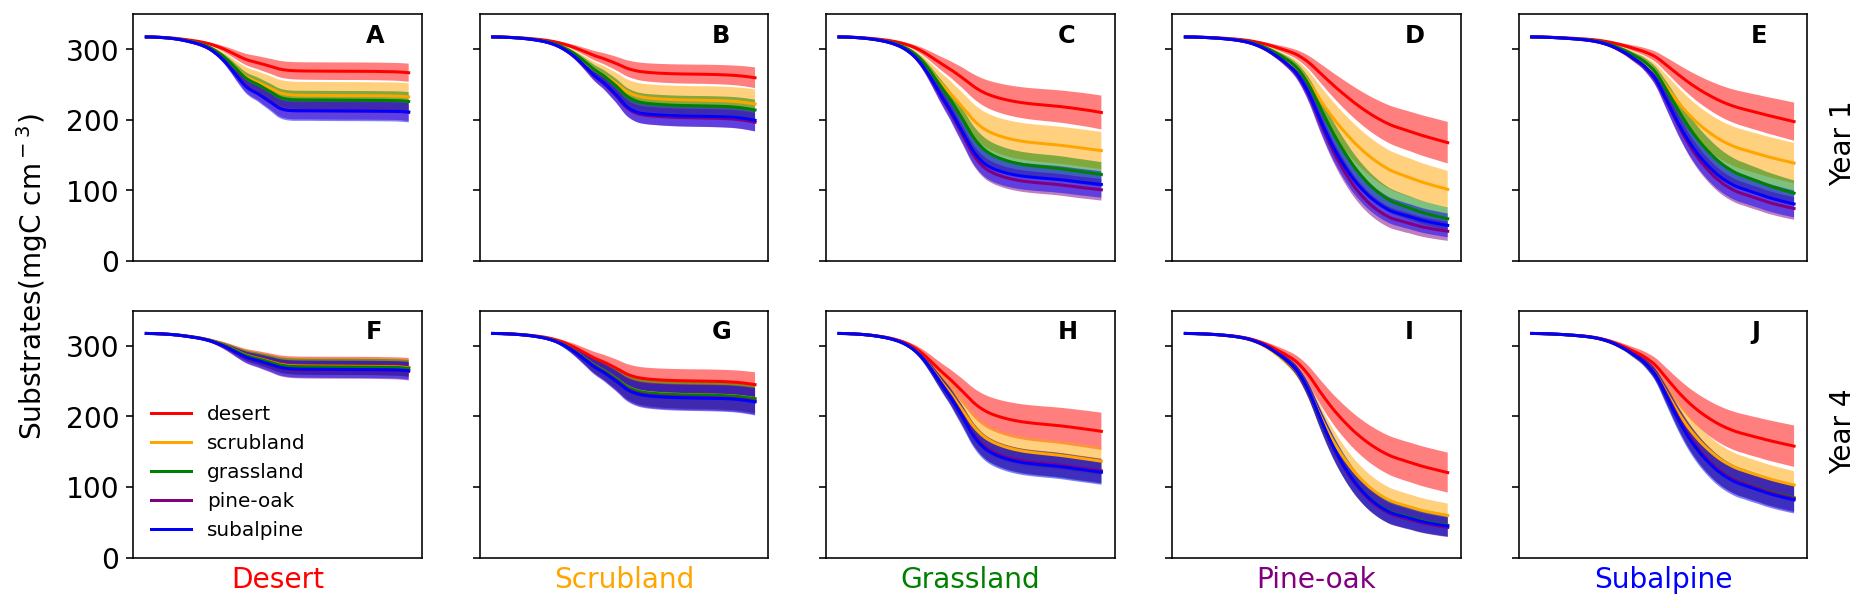

In [5]:
fig,((ax1,ax3,ax5,ax7,ax9),(ax2,ax4,ax6,ax8,ax10)) = plt.subplots(2,5,figsize=(15,5))

plot_function(ax1, sub_de_de, sub_sc_de, sub_gr_de, sub_pi_de, sub_su_de,year=4,ylabel=True)
ax1.text(5*365-60,310, 'A',fontsize=12,c='k',weight='heavy')
plot_function(ax2, sub_de_de, sub_sc_de, sub_gr_de, sub_pi_de, sub_su_de,year=7,ylabel=True)
ax2.text(8*365-60,310, 'F',fontsize=12,c='k',weight='heavy')
ax2.set_xlabel('Desert',size=14, c='red')
ax2.legend(['desert','scrubland','grassland','pine-oak','subalpine'],frameon=False)


plot_function(ax3, sub_de_sc, sub_sc_sc, sub_gr_sc, sub_pi_sc, sub_su_sc,year=4)
ax3.text(5*365-60,310, 'B',fontsize=12,c='k',weight='heavy')
plot_function(ax4, sub_de_sc, sub_sc_sc, sub_gr_sc, sub_pi_sc, sub_su_sc,year=7)
ax4.text(8*365-60,310, 'G',fontsize=12,c='k',weight='heavy')
ax4.set_xlabel('Scrubland',size=14,c='orange')

plot_function(ax5, sub_de_gr, sub_sc_gr, sub_gr_gr, sub_pi_gr, sub_su_gr,year=4)
ax5.text(5*365-60,310, 'C',fontsize=12,c='k',weight='heavy')
plot_function(ax6, sub_de_gr, sub_sc_gr, sub_gr_gr, sub_pi_gr, sub_su_gr,year=7)
ax6.text(8*365-60,310, 'H',fontsize=12,c='k',weight='heavy')
ax6.set_xlabel('Grassland',size=14,c='green')

plot_function(ax7, sub_de_pi, sub_sc_pi, sub_gr_pi, sub_pi_pi, sub_su_pi,year=4)
ax7.text(5*365-60,310, 'D',fontsize=12,c='k',weight='heavy')
plot_function(ax8, sub_de_pi, sub_sc_pi, sub_gr_pi, sub_pi_pi, sub_su_pi,year=7)
ax8.text(8*365-60,310, 'I',fontsize=12,c='k',weight='heavy')
ax8.set_xlabel('Pine-oak',size=14,c='purple')

plot_function(ax9, sub_de_su, sub_sc_su, sub_gr_su, sub_pi_su, sub_su_su,year=4)
ax9.text(5*365-60,310, 'E',fontsize=12,c='k',weight='heavy')
plot_function(ax10,sub_de_su, sub_sc_su, sub_gr_su, sub_pi_su, sub_su_su,year=7)
ax10.text(8*365-60,310, 'J',fontsize=12,c='k',weight='heavy')
ax10.set_xlabel('Subalpine',size=14,c='blue')


plt.figtext(0.07,0.30, 'Substrates(mgC cm$^-$$^3$)', fontsize=14, weight='normal', rotation=90)
plt.figtext(0.91,0.65, 'Year 1',fontsize=14, weight='normal',rotation=90)
plt.figtext(0.91,0.25, 'Year 4',fontsize=14, weight='normal',rotation=90)

#plt.figtext(0.91,0.80, 'desert',   fontsize=14, weight='normal',c='red',   rotation=90)
#plt.figtext(0.91,0.61, 'scrubland',fontsize=14, weight='normal',c='orange',rotation=90)
#plt.figtext(0.91,0.45, 'grassland',fontsize=14, weight='normal',c='green', rotation=90)
#plt.figtext(0.91,0.31, 'pine-oak', fontsize=14, weight='normal',c='purple',rotation=90)
#plt.figtext(0.91,0.14, 'subalpine',fontsize=14, weight='normal',c='blue',  rotation=90)

plt.subplots_adjust(wspace=0.2)

plt.savefig('figures/decomposition.pdf',bbox_inches='tight')

plt.show()

## Mass loss

In [4]:
de_de = sub_de_de[4*365+1:5*365+1]
de_sc = sub_sc_de[4*365+1:5*365+1]
de_gr = sub_gr_de[4*365+1:5*365+1]
de_pi = sub_pi_de[4*365+1:5*365+1]
de_su = sub_su_de[4*365+1:5*365+1]


sc_de = sub_de_sc[4*365+1:5*365+1]
sc_sc = sub_sc_sc[4*365+1:5*365+1]
sc_gr = sub_gr_sc[4*365+1:5*365+1]
sc_pi = sub_pi_sc[4*365+1:5*365+1]
sc_su = sub_su_sc[4*365+1:5*365+1]


gr_de = sub_de_gr[4*365+1:5*365+1]
gr_sc = sub_sc_gr[4*365+1:5*365+1]
gr_gr = sub_gr_gr[4*365+1:5*365+1]
gr_pi = sub_pi_gr[4*365+1:5*365+1]
gr_su = sub_su_gr[4*365+1:5*365+1]


pi_de = sub_de_pi[4*365+1:5*365+1]
pi_sc = sub_sc_pi[4*365+1:5*365+1]
pi_gr = sub_gr_pi[4*365+1:5*365+1]
pi_pi = sub_pi_pi[4*365+1:5*365+1]
pi_su = sub_su_pi[4*365+1:5*365+1]


su_de = sub_de_su[4*365+1:5*365+1]
su_sc = sub_sc_su[4*365+1:5*365+1]
su_gr = sub_gr_su[4*365+1:5*365+1]
su_pi = sub_pi_su[4*365+1:5*365+1]
su_su = sub_su_su[4*365+1:5*365+1]

In [5]:
model_mean1 =[
    np.mean(100*(de_de.iloc[0,:]-de_de.iloc[180,:])/de_de.iloc[0,:]),
    np.mean(100*(de_sc.iloc[0,:]-de_sc.iloc[180,:])/de_sc.iloc[0,:]),
    np.mean(100*(de_gr.iloc[0,:]-de_gr.iloc[180,:])/de_gr.iloc[0,:]),
    np.mean(100*(de_pi.iloc[0,:]-de_pi.iloc[180,:])/de_pi.iloc[0,:]),
    np.mean(100*(de_su.iloc[0,:]-de_su.iloc[180,:])/de_su.iloc[0,:]),
    
    np.mean(100*(sc_de.iloc[0,:]-sc_de.iloc[180,:])/sc_de.iloc[0,:]),
    np.mean(100*(sc_sc.iloc[0,:]-sc_sc.iloc[180,:])/sc_sc.iloc[0,:]),
    np.mean(100*(sc_gr.iloc[0,:]-sc_gr.iloc[180,:])/sc_gr.iloc[0,:]),
    np.mean(100*(sc_pi.iloc[0,:]-sc_pi.iloc[180,:])/sc_pi.iloc[0,:]),
    np.mean(100*(sc_su.iloc[0,:]-sc_su.iloc[180,:])/sc_su.iloc[0,:]),
    
    np.mean(100*(gr_de.iloc[0,:]-gr_de.iloc[180,:])/gr_de.iloc[0,:]),
    np.mean(100*(gr_sc.iloc[0,:]-gr_sc.iloc[180,:])/gr_sc.iloc[0,:]),
    np.mean(100*(gr_gr.iloc[0,:]-gr_gr.iloc[180,:])/gr_gr.iloc[0,:]),
    np.mean(100*(gr_pi.iloc[0,:]-gr_pi.iloc[180,:])/gr_pi.iloc[0,:]),
    np.mean(100*(gr_su.iloc[0,:]-gr_su.iloc[180,:])/gr_su.iloc[0,:]),
    
    np.mean(100*(pi_de.iloc[0,:]-pi_de.iloc[180,:])/pi_de.iloc[0,:]),
    np.mean(100*(pi_sc.iloc[0,:]-pi_sc.iloc[180,:])/pi_sc.iloc[0,:]),
    np.mean(100*(pi_gr.iloc[0,:]-pi_gr.iloc[180,:])/pi_gr.iloc[0,:]),
    np.mean(100*(pi_pi.iloc[0,:]-pi_pi.iloc[180,:])/pi_pi.iloc[0,:]),
    np.mean(100*(pi_su.iloc[0,:]-pi_su.iloc[180,:])/pi_su.iloc[0,:]),
    
    np.mean(100*(su_de.iloc[0,:]-su_de.iloc[180,:])/su_de.iloc[0,:]),
    np.mean(100*(su_sc.iloc[0,:]-su_sc.iloc[180,:])/su_sc.iloc[0,:]),
    np.mean(100*(su_gr.iloc[0,:]-su_gr.iloc[180,:])/su_gr.iloc[0,:]),
    np.mean(100*(su_pi.iloc[0,:]-su_pi.iloc[180,:])/su_pi.iloc[0,:]),
    np.mean(100*(su_su.iloc[0,:]-su_su.iloc[180,:])/su_su.iloc[0,:]),
] 

In [6]:
model_mean2 =[
    np.mean(100*(de_de.iloc[0,:]-de_de.iloc[364,:])/de_de.iloc[0,:]),
    np.mean(100*(de_sc.iloc[0,:]-de_sc.iloc[364,:])/de_sc.iloc[0,:]),
    np.mean(100*(de_gr.iloc[0,:]-de_gr.iloc[364,:])/de_gr.iloc[0,:]),
    np.mean(100*(de_pi.iloc[0,:]-de_pi.iloc[364,:])/de_pi.iloc[0,:]),
    np.mean(100*(de_su.iloc[0,:]-de_su.iloc[364,:])/de_su.iloc[0,:]),
    
    np.mean(100*(sc_de.iloc[0,:]-sc_de.iloc[364,:])/sc_de.iloc[0,:]),
    np.mean(100*(sc_sc.iloc[0,:]-sc_sc.iloc[364,:])/sc_sc.iloc[0,:]),
    np.mean(100*(sc_gr.iloc[0,:]-sc_gr.iloc[364,:])/sc_gr.iloc[0,:]),
    np.mean(100*(sc_pi.iloc[0,:]-sc_pi.iloc[364,:])/sc_pi.iloc[0,:]),
    np.mean(100*(sc_su.iloc[0,:]-sc_su.iloc[364,:])/sc_su.iloc[0,:]),
    
    np.mean(100*(gr_de.iloc[0,:]-gr_de.iloc[364,:])/gr_de.iloc[0,:]),
    np.mean(100*(gr_sc.iloc[0,:]-gr_sc.iloc[364,:])/gr_sc.iloc[0,:]),
    np.mean(100*(gr_gr.iloc[0,:]-gr_gr.iloc[364,:])/gr_gr.iloc[0,:]),
    np.mean(100*(gr_pi.iloc[0,:]-gr_pi.iloc[364,:])/gr_pi.iloc[0,:]),
    np.mean(100*(gr_su.iloc[0,:]-gr_su.iloc[364,:])/gr_su.iloc[0,:]),
    
    np.mean(100*(pi_de.iloc[0,:]-pi_de.iloc[364,:])/pi_de.iloc[0,:]),
    np.mean(100*(pi_sc.iloc[0,:]-pi_sc.iloc[364,:])/pi_sc.iloc[0,:]),
    np.mean(100*(pi_gr.iloc[0,:]-pi_gr.iloc[364,:])/pi_gr.iloc[0,:]),
    np.mean(100*(pi_pi.iloc[0,:]-pi_pi.iloc[364,:])/pi_pi.iloc[0,:]),
    np.mean(100*(pi_su.iloc[0,:]-pi_su.iloc[364,:])/pi_su.iloc[0,:]),
    
    np.mean(100*(su_de.iloc[0,:]-su_de.iloc[364,:])/su_de.iloc[0,:]),
    np.mean(100*(su_sc.iloc[0,:]-su_sc.iloc[364,:])/su_sc.iloc[0,:]),
    np.mean(100*(su_gr.iloc[0,:]-su_gr.iloc[364,:])/su_gr.iloc[0,:]),
    np.mean(100*(su_pi.iloc[0,:]-su_pi.iloc[364,:])/su_pi.iloc[0,:]),
    np.mean(100*(su_su.iloc[0,:]-su_su.iloc[364,:])/su_su.iloc[0,:]),
] 

In [7]:
model_mean2

[15.970016629411159,
 26.748699935049654,
 28.786592748415142,
 33.54247683280852,
 33.54163453649218,
 18.205808762276128,
 29.90845592440553,
 32.581181533556595,
 38.040152814311064,
 37.178384200529436,
 33.721464956004475,
 50.715278075447955,
 61.38174505415857,
 68.1983512471675,
 65.81777022194805,
 47.166219966499696,
 67.9912320124807,
 81.07467499422981,
 86.67610221814195,
 84.06661476489288,
 37.786196309680705,
 56.28949461475965,
 69.67114823461226,
 76.52844763347915,
 74.49071159656211]

## Data of traits

In [2]:
enz_de_de = pd.read_csv('desert/Enz_desert_desert.csv',      index_col=0)
enz_sc_de = pd.read_csv('scrubland/Enz_scrubland_desert.csv',index_col=0)
enz_gr_de = pd.read_csv('grassland/Enz_grassland_desert.csv',index_col=0)
enz_pi_de = pd.read_csv('pineoak/Enz_pineoak_desert.csv',    index_col=0)
enz_su_de = pd.read_csv('subalpine/Enz_subalpine_desert.csv',index_col=0)


enz_de_sc = pd.read_csv('desert/Enz_desert_scrubland.csv',      index_col=0)
enz_sc_sc = pd.read_csv('scrubland/Enz_scrubland_scrubland.csv',index_col=0)
enz_gr_sc = pd.read_csv('grassland/Enz_grassland_scrubland.csv',index_col=0)
enz_pi_sc = pd.read_csv('pineoak/Enz_pineoak_scrubland.csv',    index_col=0)
enz_su_sc = pd.read_csv('subalpine/Enz_subalpine_scrubland.csv',index_col=0)


enz_de_gr = pd.read_csv('desert/Enz_desert_grassland.csv',      index_col=0)
enz_sc_gr = pd.read_csv('scrubland/Enz_scrubland_grassland.csv',index_col=0)
enz_gr_gr = pd.read_csv('grassland/Enz_grassland_grassland.csv',index_col=0)
enz_pi_gr = pd.read_csv('pineoak/Enz_pineoak_grassland.csv',    index_col=0)
enz_su_gr = pd.read_csv('subalpine/Enz_subalpine_grassland.csv',index_col=0)


enz_de_pi = pd.read_csv('desert/Enz_desert_pineoak.csv',      index_col=0)
enz_sc_pi = pd.read_csv('scrubland/Enz_scrubland_pineoak.csv',index_col=0)
enz_gr_pi = pd.read_csv('grassland/Enz_grassland_pineoak.csv',index_col=0)
enz_pi_pi = pd.read_csv('pineoak/Enz_pineoak_pineoak.csv',    index_col=0)
enz_su_pi = pd.read_csv('subalpine/Enz_subalpine_pineoak.csv',index_col=0)


enz_de_su = pd.read_csv('desert/Enz_desert_subalpine.csv',      index_col=0)
enz_sc_su = pd.read_csv('scrubland/Enz_scrubland_subalpine.csv',index_col=0)
enz_gr_su = pd.read_csv('grassland/Enz_grassland_subalpine.csv',index_col=0)
enz_pi_su = pd.read_csv('pineoak/Enz_pineoak_subalpine.csv',    index_col=0)
enz_su_su = pd.read_csv('subalpine/Enz_subalpine_subalpine.csv',index_col=0)

In [3]:
drt_de_de = pd.read_csv('desert/Drt_desert_desert.csv',      index_col=0)
drt_sc_de = pd.read_csv('scrubland/Drt_scrubland_desert.csv',index_col=0)
drt_gr_de = pd.read_csv('grassland/Drt_grassland_desert.csv',index_col=0)
drt_pi_de = pd.read_csv('pineoak/Drt_pineoak_desert.csv',    index_col=0)
drt_su_de = pd.read_csv('subalpine/Drt_subalpine_desert.csv',index_col=0)


drt_de_sc = pd.read_csv('desert/Drt_desert_scrubland.csv',      index_col=0)
drt_sc_sc = pd.read_csv('scrubland/Drt_scrubland_scrubland.csv',index_col=0)
drt_gr_sc = pd.read_csv('grassland/Drt_grassland_scrubland.csv',index_col=0)
drt_pi_sc = pd.read_csv('pineoak/Drt_pineoak_scrubland.csv',    index_col=0)
drt_su_sc = pd.read_csv('subalpine/Drt_subalpine_scrubland.csv',index_col=0)


drt_de_gr = pd.read_csv('desert/Drt_desert_grassland.csv',      index_col=0)
drt_sc_gr = pd.read_csv('scrubland/Drt_scrubland_grassland.csv',index_col=0)
drt_gr_gr = pd.read_csv('grassland/Drt_grassland_grassland.csv',index_col=0)
drt_pi_gr = pd.read_csv('pineoak/Drt_pineoak_grassland.csv',    index_col=0)
drt_su_gr = pd.read_csv('subalpine/Drt_subalpine_grassland.csv',index_col=0)


drt_de_pi = pd.read_csv('desert/Drt_desert_pineoak.csv',      index_col=0)
drt_sc_pi = pd.read_csv('scrubland/Drt_scrubland_pineoak.csv',index_col=0)
drt_gr_pi = pd.read_csv('grassland/Drt_grassland_pineoak.csv',index_col=0)
drt_pi_pi = pd.read_csv('pineoak/Drt_pineoak_pineoak.csv',    index_col=0)
drt_su_pi = pd.read_csv('subalpine/Drt_subalpine_pineoak.csv',index_col=0)


drt_de_su = pd.read_csv('desert/Drt_desert_subalpine.csv',      index_col=0)
drt_sc_su = pd.read_csv('scrubland/Drt_scrubland_subalpine.csv',index_col=0)
drt_gr_su = pd.read_csv('grassland/Drt_grassland_subalpine.csv',index_col=0)
drt_pi_su = pd.read_csv('pineoak/Drt_pineoak_subalpine.csv',    index_col=0)
drt_su_su = pd.read_csv('subalpine/Drt_subalpine_subalpine.csv',index_col=0)

In [8]:
def plot_function(ax,
                  sub_de_de, sub_sc_de, sub_gr_de, sub_pi_de, sub_su_de,
                  year,
                  alpha = 0.10,
                  xlabel= False,
                  ylabel= False):
    """
    Plot a site with specified time period.
    
    Parameters:
      ax:
      year:
      alpha:  confidence level
      xlabel: how to handle xaxis label
      ylabel: how to handle yaxis label
    """
    
    lb = year*365+1
    ub = (year+1)*365+1
    
    ## confidence interval
    sub_de_de_bound   = confi_interval(sub_de_de.iloc[:,:],alpha)
    sub_sc_de_bound   = confi_interval(sub_sc_de.iloc[:,:],alpha)
    sub_gr_de_bound   = confi_interval(sub_gr_de.iloc[:,:],alpha)
    sub_pi_de_bound   = confi_interval(sub_pi_de.iloc[:,:],alpha)
    sub_su_de_bound   = confi_interval(sub_su_de.iloc[:,:],alpha)
    
    
    #ax.set_xlabel('Day',size=14)
    ax.tick_params(bottom=False,labelbottom=False)
    ax.yaxis.set_tick_params(labelsize=14)
    #ax.set_ylim(35,350)
    if xlabel == True:
        if ax == ax9:
            ax.set_xlabel('Year-1',size=14)
        if ax == ax10:
            ax.set_xlabel('Year-4',size=14)
    if ylabel == True:
        ax.set_ylabel('Substrates(mgC cm$^-$$^3$)',size=14)

    ax.plot(sub_de_de.mean(axis=1).iloc[lb:ub],color='red',linestyle='-')
    ax.fill_between(x=sub_de_de.index[lb:ub],y1=sub_de_de_bound[0][lb:ub],y2=sub_de_de_bound[1][lb:ub], facecolor='red',alpha=0.5)

    ax.plot(sub_sc_de.mean(axis=1).iloc[lb:ub],color='orange',linestyle='-')
    ax.fill_between(x=sub_sc_de.index[lb:ub],y1=sub_sc_de_bound[0][lb:ub],y2=sub_sc_de_bound[1][lb:ub], facecolor='orange',alpha=0.5)

    ax.plot(sub_gr_de.mean(axis=1).iloc[lb:ub],color='green',linestyle='-')
    ax.fill_between(x=sub_gr_de.index[lb:ub],y1=sub_gr_de_bound[0][lb:ub],y2=sub_gr_de_bound[1][lb:ub], facecolor='green',alpha=0.4)

    ax.plot(sub_pi_de.mean(axis=1).iloc[lb:ub],color='purple',linestyle='-')
    ax.fill_between(x=sub_pi_de.index[lb:ub],y1=sub_pi_de_bound[0][lb:ub],y2=sub_pi_de_bound[1][lb:ub], facecolor='purple',alpha=0.3)

    ax.plot(sub_su_de.mean(axis=1).iloc[lb:ub],color='blue',linestyle='-')
    ax.fill_between(x=sub_su_de.index[lb:ub],y1=sub_su_de_bound[0][lb:ub],y2=sub_su_de_bound[1][lb:ub], facecolor='blue',alpha=0.1)


    #plt.show()

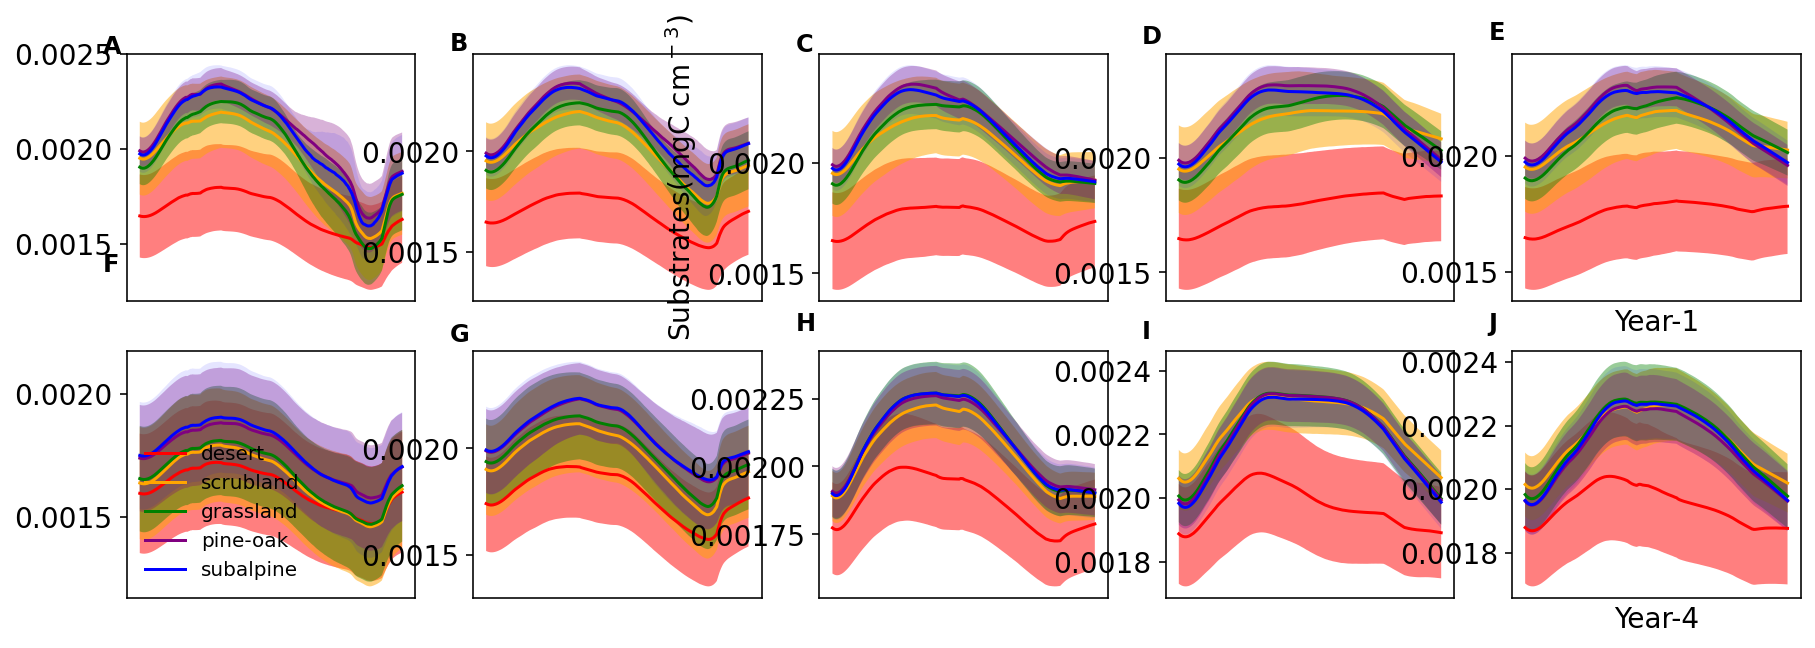

In [9]:
fig,((ax1,ax3,ax5,ax7,ax9),(ax2,ax4,ax6,ax8,ax10)) = plt.subplots(2,5,figsize=(15,5))
#fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))

plot_function(ax1, enz_de_de, enz_sc_de, enz_gr_de, enz_pi_de, enz_su_de,year=4)
ax1.text(4*365-50,0.0025, 'A',fontsize=12,c='k',weight='heavy')
plot_function(ax2, enz_de_de, enz_sc_de, enz_gr_de, enz_pi_de, enz_su_de,year=7)
ax2.text(7*365-50,0.0025, 'F',fontsize=12,c='k',weight='heavy')
ax2.legend(['desert','scrubland','grassland','pine-oak','subalpine'],frameon=False)


plot_function(ax3, enz_de_sc, enz_sc_sc, enz_gr_sc, enz_pi_sc, enz_su_sc,year=4)
ax3.text(4*365-50,0.0025, 'B',fontsize=12,c='k',weight='heavy')
plot_function(ax4, enz_de_sc, enz_sc_sc, enz_gr_sc, enz_pi_sc, enz_su_sc,year=7)
ax4.text(7*365-50,0.0025, 'G',fontsize=12,c='k',weight='heavy')


plot_function(ax5, enz_de_gr, enz_sc_gr, enz_gr_gr, enz_pi_gr, enz_su_gr,year=4,ylabel=True)
ax5.text(4*365-50,0.0025, 'C',fontsize=12,c='k',weight='heavy')
plot_function(ax6, enz_de_gr, enz_sc_gr, enz_gr_gr, enz_pi_gr, enz_su_gr,year=7)
ax6.text(7*365-50,0.0025, 'H',fontsize=12,c='k',weight='heavy')

plot_function(ax7, enz_de_pi, enz_sc_pi, enz_gr_pi, enz_pi_pi, enz_su_pi,year=4)
ax7.text(4*365-50,0.0025, 'D',fontsize=12,c='k',weight='heavy')
plot_function(ax8, enz_de_pi, enz_sc_pi, enz_gr_pi, enz_pi_pi, enz_su_pi,year=7)
ax8.text(7*365-50,0.0025, 'I',fontsize=12,c='k',weight='heavy')

plot_function(ax9, enz_de_su, enz_sc_su, enz_gr_su, enz_pi_su, enz_su_su,year=4,xlabel=True)
ax9.text(4*365-50,0.0025, 'E',fontsize=12,c='k',weight='heavy')
plot_function(ax10,enz_de_su, enz_sc_su, enz_gr_su, enz_pi_su, enz_su_su,year=7,xlabel=True)
ax10.text(7*365-50,0.0025, 'J',fontsize=12,c='k',weight='heavy')


#plt.figtext(0.91,0.80, 'desert',   fontsize=14, weight='normal',c='red',   rotation=90)
#plt.figtext(0.91,0.61, 'scrubland',fontsize=14, weight='normal',c='orange',rotation=90)
#plt.figtext(0.91,0.45, 'grassland',fontsize=14, weight='normal',c='green', rotation=90)
#plt.figtext(0.91,0.31, 'pine-oak', fontsize=14, weight='normal',c='purple',rotation=90)
#plt.figtext(0.91,0.14, 'subalpine',fontsize=14, weight='normal',c='blue',  rotation=90)

#plt.savefig('figures/decomposition.pdf',bbox_inches='tight')

plt.show()

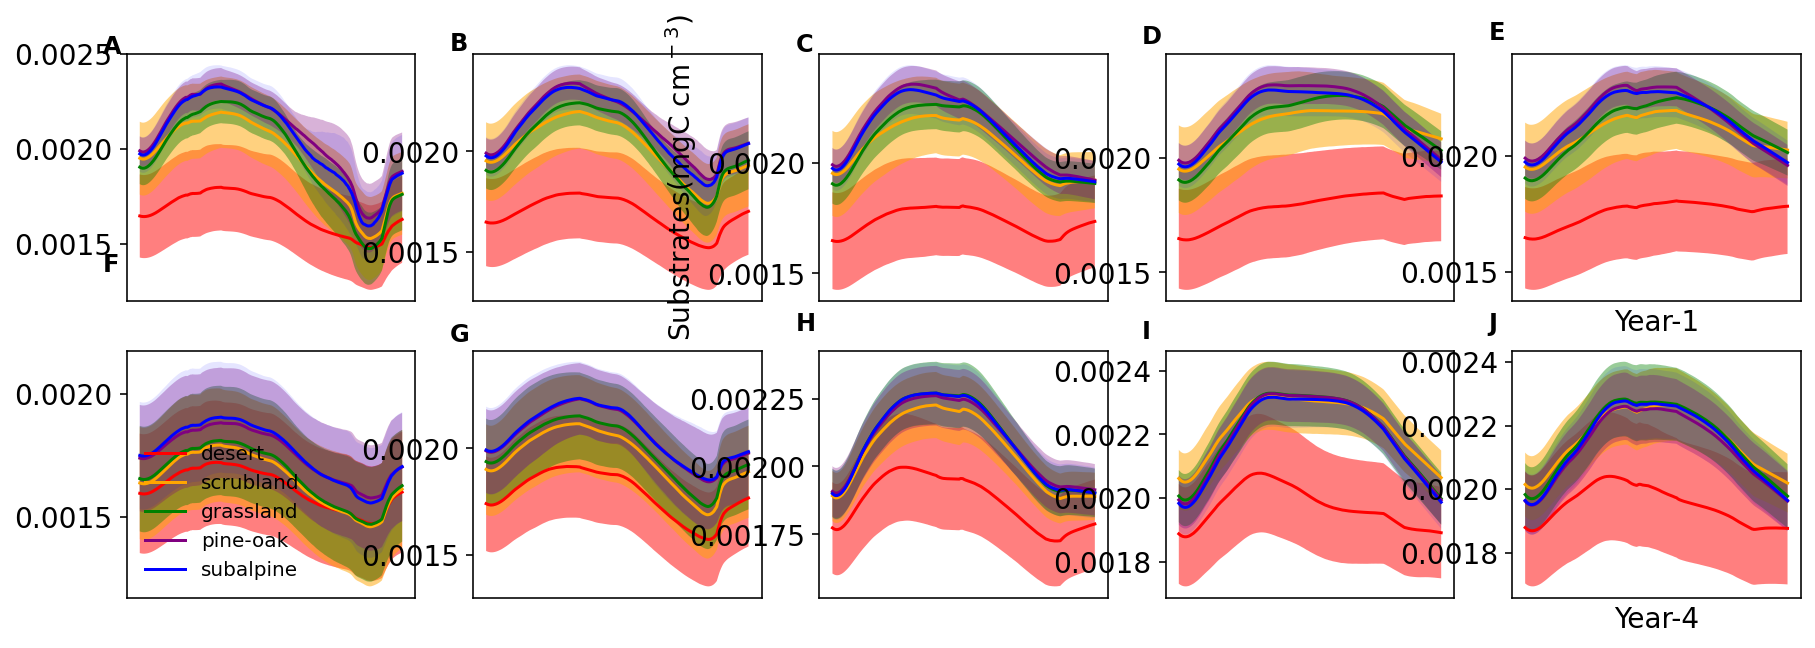

In [10]:
#####  drought tolerance trait  ########

fig,((ax1,ax3,ax5,ax7,ax9),(ax2,ax4,ax6,ax8,ax10)) = plt.subplots(2,5,figsize=(15,5))
#fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))

plot_function(ax1, enz_de_de, enz_sc_de, enz_gr_de, enz_pi_de, enz_su_de,year=4)
ax1.text(4*365-50,0.0025, 'A',fontsize=12,c='k',weight='heavy')
plot_function(ax2, enz_de_de, enz_sc_de, enz_gr_de, enz_pi_de, enz_su_de,year=7)
ax2.text(7*365-50,0.0025, 'F',fontsize=12,c='k',weight='heavy')
ax2.legend(['desert','scrubland','grassland','pine-oak','subalpine'],frameon=False)


plot_function(ax3, enz_de_sc, enz_sc_sc, enz_gr_sc, enz_pi_sc, enz_su_sc,year=4)
ax3.text(4*365-50,0.0025, 'B',fontsize=12,c='k',weight='heavy')
plot_function(ax4, enz_de_sc, enz_sc_sc, enz_gr_sc, enz_pi_sc, enz_su_sc,year=7)
ax4.text(7*365-50,0.0025, 'G',fontsize=12,c='k',weight='heavy')


plot_function(ax5, enz_de_gr, enz_sc_gr, enz_gr_gr, enz_pi_gr, enz_su_gr,year=4,ylabel=True)
ax5.text(4*365-50,0.0025, 'C',fontsize=12,c='k',weight='heavy')
plot_function(ax6, enz_de_gr, enz_sc_gr, enz_gr_gr, enz_pi_gr, enz_su_gr,year=7)
ax6.text(7*365-50,0.0025, 'H',fontsize=12,c='k',weight='heavy')

plot_function(ax7, enz_de_pi, enz_sc_pi, enz_gr_pi, enz_pi_pi, enz_su_pi,year=4)
ax7.text(4*365-50,0.0025, 'D',fontsize=12,c='k',weight='heavy')
plot_function(ax8, enz_de_pi, enz_sc_pi, enz_gr_pi, enz_pi_pi, enz_su_pi,year=7)
ax8.text(7*365-50,0.0025, 'I',fontsize=12,c='k',weight='heavy')

plot_function(ax9, enz_de_su, enz_sc_su, enz_gr_su, enz_pi_su, enz_su_su,year=4,xlabel=True)
ax9.text(4*365-50,0.0025, 'E',fontsize=12,c='k',weight='heavy')
plot_function(ax10,enz_de_su, enz_sc_su, enz_gr_su, enz_pi_su, enz_su_su,year=7,xlabel=True)
ax10.text(7*365-50,0.0025, 'J',fontsize=12,c='k',weight='heavy')


#plt.figtext(0.91,0.80, 'desert',   fontsize=14, weight='normal',c='red',   rotation=90)
#plt.figtext(0.91,0.61, 'scrubland',fontsize=14, weight='normal',c='orange',rotation=90)
#plt.figtext(0.91,0.45, 'grassland',fontsize=14, weight='normal',c='green', rotation=90)
#plt.figtext(0.91,0.31, 'pine-oak', fontsize=14, weight='normal',c='purple',rotation=90)
#plt.figtext(0.91,0.14, 'subalpine',fontsize=14, weight='normal',c='blue',  rotation=90)

#plt.savefig('figures/decomposition.pdf',bbox_inches='tight')

plt.show()

## Traits' correlation

In [11]:
#### define a concave and a linear function ########
def concave(drt,b1,b2,b3):
    """
    Concave tradeoff curve.
    
    Parameters:
      drt:
      b1:
      b2:
      b3
    Return:
      enz:
    """
    
    enz = (b1*drt + b2)/(b3 + drt)
    
    return enz

def linear(drt,a1,a2):
    
    enz = a1*drt + a2
    
    return enz

#### desert

correlation efficient (-0.39223980928676344, 5.435485701293259e-05)
popt [-0.00276429  0.0041242 ]
pcov [[ 4.28828339e-07 -3.63331800e-07]
 [-3.63331800e-07  3.10306349e-07]]
R2= 0.023670458824589267


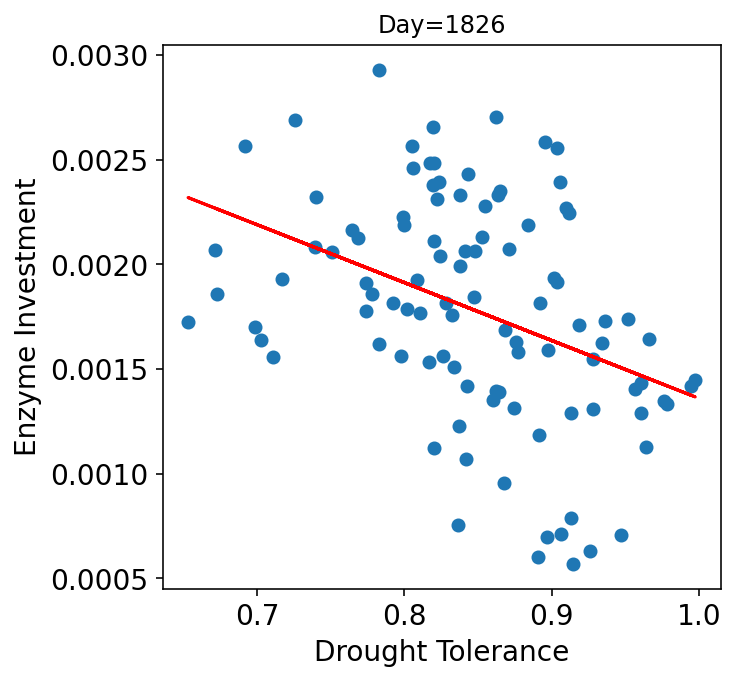

correlation efficient (-0.39233003307590314, 5.412134087981657e-05)
popt [-0.00429496  0.00555751]
pcov [[ 1.03466084e-06 -9.35271583e-07]
 [-9.35271583e-07  8.48234845e-07]]
R2= 0.0236922452462021


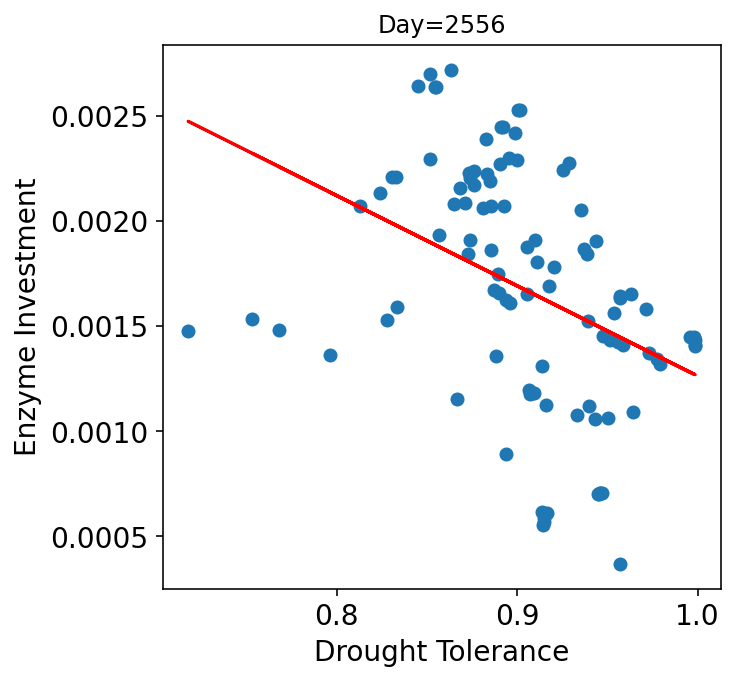

In [40]:
# first year after transplanting
for day in [5*365+1, 7*365+1]:
    
    
    drt = np.array([drt_de_de.iloc[day,:],
                    drt_sc_de.iloc[day,:],
                    drt_gr_de.iloc[day,:],
                    drt_pi_de.iloc[day,:],
                    drt_su_de.iloc[day,:]]).reshape(1,100)
    enz = np.array([enz_de_de.iloc[day,:],
                    enz_sc_de.iloc[day,:],
                    enz_gr_de.iloc[day,:],
                    enz_pi_de.iloc[day,:],
                    enz_su_de.iloc[day,:]]).reshape(1,100)
    
    # pearson corr
    print('correlation efficient',stats.pearsonr(drt[0,:],enz[0,:]))
    
    # concave curve fit
    popt,pcov = curve_fit(linear,drt[0,:],enz[0,:])
    print('popt',popt)
    print('pcov',pcov)
    
    ss_res = np.sum((enz[0,:]-linear(drt[0,:],popt[0],popt[1]))**2)
    ss_tot = np.sum((enz[0,:] - np.mean(enz[0,:]))**2)
    print('R2=',(1-ss_res/ss_tot)**2)
    
    # plotting
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    ax.set_title('Day='+str(day))
    ax.set_xlabel('Drought Tolerance',size=14)
    ax.set_ylabel('Enzyme Investment',size=14)
    
    ax.scatter(drt[0,:],enz[0,:])
    #ax.plot(drt[0,:],concave(drt[0,:],popt[0],popt[1],popt[2]),c='r')
    ax.plot(drt[0,:],linear(drt[0,:],popt[0],popt[1]),c='r')
    
    plt.show()

### scrubland

correlation efficient (-0.3879605243969594, 6.657378250853349e-05)
popt [-0.0014823   0.00304119]
pcov [[ 1.26540090e-07 -9.47733016e-08]
 [-9.47733016e-08  7.26776466e-08]]
R2= 0.022654274094316033


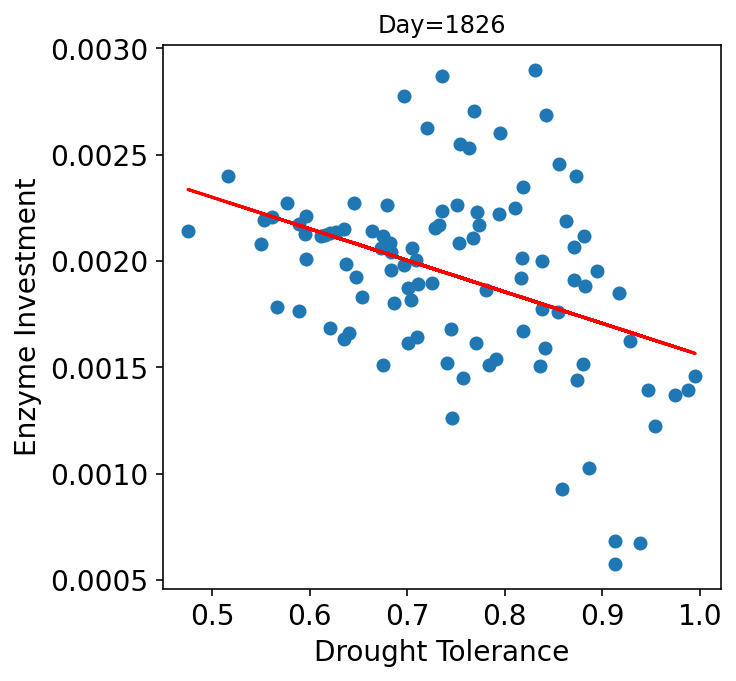

correlation efficient (-0.43844968985848354, 5.052583709395032e-06)
popt [-0.00262982  0.00403006]
pcov [[ 2.96529817e-07 -2.38822812e-07]
 [-2.38822812e-07  1.94673989e-07]]
R2= 0.03695549883236078


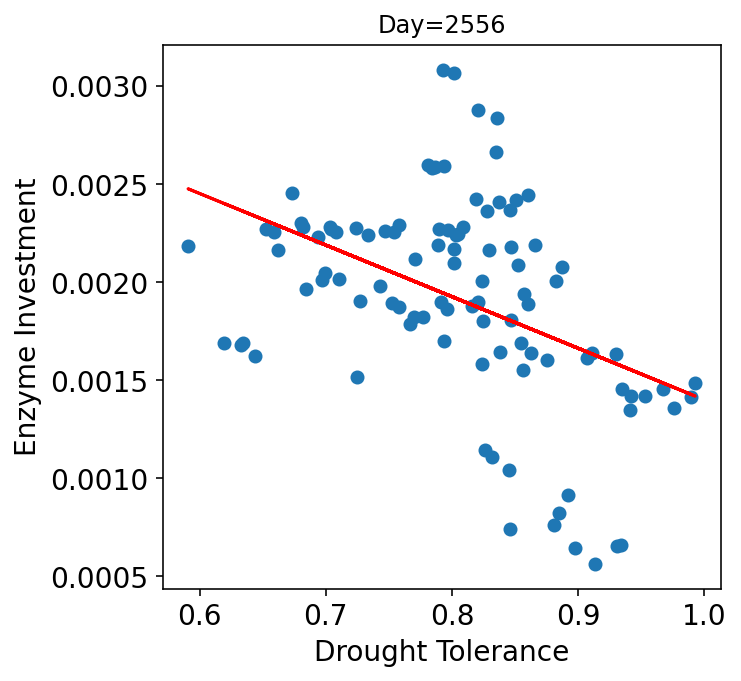

In [43]:
# first year after transplanting
for day in [5*365+1, 7*365+1]:
    
    
    drt = np.array([drt_de_sc.iloc[day,:],
                    drt_sc_sc.iloc[day,:],
                    drt_gr_sc.iloc[day,:],
                    drt_pi_sc.iloc[day,:],
                    drt_su_sc.iloc[day,:]]).reshape(1,100)
    enz = np.array([enz_de_sc.iloc[day,:],
                    enz_sc_sc.iloc[day,:],
                    enz_gr_sc.iloc[day,:],
                    enz_pi_sc.iloc[day,:],
                    enz_su_sc.iloc[day,:]]).reshape(1,100)
    
    # pearson corr
    print('correlation efficient',stats.pearsonr(drt[0,:],enz[0,:]))
    
    # concave curve fit
    popt,pcov = curve_fit(linear,drt[0,:],enz[0,:])
    print('popt',popt)
    print('pcov',pcov)
    
    ss_res = np.sum((enz[0,:]-linear(drt[0,:],popt[0],popt[1]))**2)
    ss_tot = np.sum((enz[0,:] - np.mean(enz[0,:]))**2)
    print('R2=',(1-ss_res/ss_tot)**2)
    
    # plotting
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    ax.set_title('Day='+str(day))
    ax.set_xlabel('Drought Tolerance',size=14)
    ax.set_ylabel('Enzyme Investment',size=14)
    
    ax.scatter(drt[0,:],enz[0,:])
    #ax.plot(drt[0,:],concave(drt[0,:],popt[0],popt[1],popt[2]),c='r')
    ax.plot(drt[0,:],linear(drt[0,:],popt[0],popt[1]),c='r')
    
    plt.show()

#### grassland

correlation efficient (-0.29999262664302373, 0.00242636173499401)
popt [-0.00063171  0.00227794]
pcov [[ 4.11747210e-08 -2.59866869e-08]
 [-2.59866869e-08  1.74491237e-08]]
R2= 0.008099203706803929


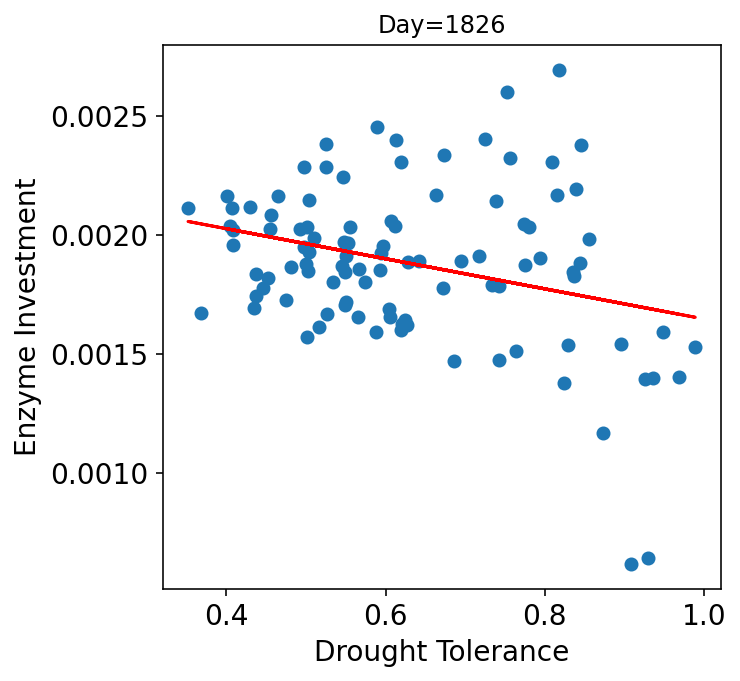

correlation efficient (-0.28522012121705603, 0.004023129002578351)
popt [-0.00058589  0.00223839]
pcov [[ 3.95541432e-08 -2.45006723e-08]
 [-2.45006723e-08  1.59344589e-08]]
R2= 0.006617906705176453


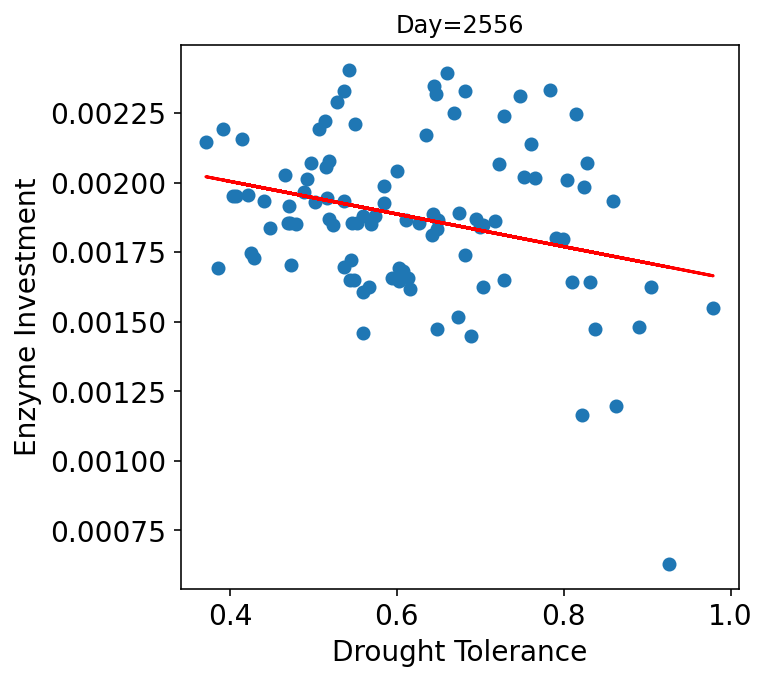

In [44]:
# first year after transplanting
for day in [5*365+1, 7*365+1]:
    
    
    drt = np.array([drt_de_gr.iloc[day,:],
                    drt_sc_gr.iloc[day,:],
                    drt_gr_gr.iloc[day,:],
                    drt_pi_gr.iloc[day,:],
                    drt_su_gr.iloc[day,:]]).reshape(1,100)
    enz = np.array([enz_de_gr.iloc[day,:],
                    enz_sc_gr.iloc[day,:],
                    enz_gr_gr.iloc[day,:],
                    enz_pi_gr.iloc[day,:],
                    enz_su_gr.iloc[day,:]]).reshape(1,100)
    
    # pearson corr
    print('correlation efficient',stats.pearsonr(drt[0,:],enz[0,:]))
    
    # concave curve fit
    popt,pcov = curve_fit(linear,drt[0,:],enz[0,:])
    print('popt',popt)
    print('pcov',pcov)
    
    ss_res = np.sum((enz[0,:]-linear(drt[0,:],popt[0],popt[1]))**2)
    ss_tot = np.sum((enz[0,:] - np.mean(enz[0,:]))**2)
    print('R2=',(1-ss_res/ss_tot)**2)
    
    # plotting
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    ax.set_title('Day='+str(day))
    ax.set_xlabel('Drought Tolerance',size=14)
    ax.set_ylabel('Enzyme Investment',size=14)
    
    ax.scatter(drt[0,:],enz[0,:])
    #ax.plot(drt[0,:],concave(drt[0,:],popt[0],popt[1],popt[2]),c='r')
    ax.plot(drt[0,:],linear(drt[0,:],popt[0],popt[1]),c='r')
    
    plt.show()

#### pine-oak

correlation efficient (-0.24964974891215902, 0.0122483376093496)
popt [-0.00046349  0.00226066]
pcov [[ 3.29796894e-08 -1.96679150e-08]
 [-1.96679150e-08  1.26730356e-08]]
R2= 0.0038844052674918673


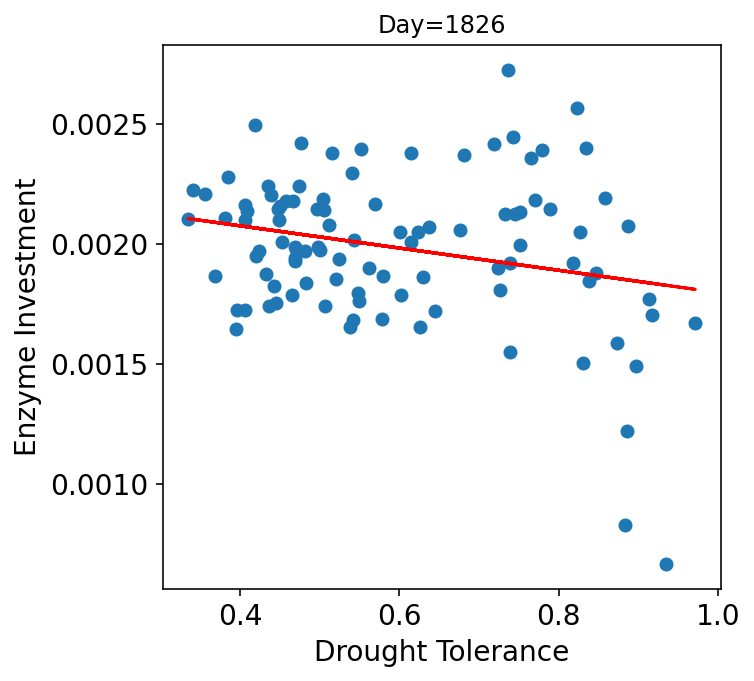

correlation efficient (-0.23805900850699446, 0.017076483425888234)
popt [-0.00042379  0.00223387]
pcov [[ 3.05053945e-08 -1.77611254e-08]
 [-1.77611254e-08  1.10122406e-08]]
R2= 0.0032117259585358374


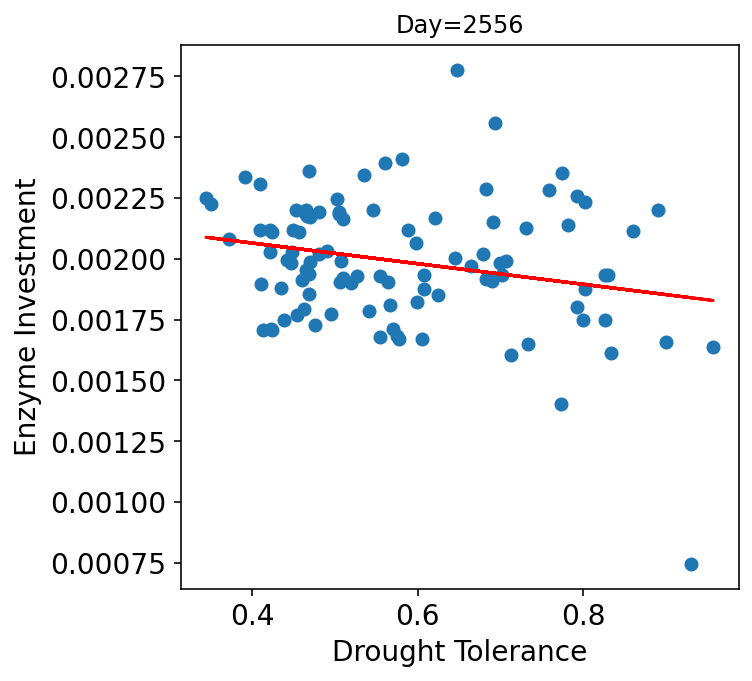

In [41]:
# first year after transplanting
for day in [5*365+1, 7*365+1]:
    
    
    drt = np.array([drt_de_pi.iloc[day,:],
                    drt_sc_pi.iloc[day,:],
                    drt_gr_pi.iloc[day,:],
                    drt_pi_pi.iloc[day,:],
                    drt_su_pi.iloc[day,:]]).reshape(1,100)
    enz = np.array([enz_de_pi.iloc[day,:],
                    enz_sc_pi.iloc[day,:],
                    enz_gr_pi.iloc[day,:],
                    enz_pi_pi.iloc[day,:],
                    enz_su_pi.iloc[day,:]]).reshape(1,100)
    
    # pearson corr
    print('correlation efficient',stats.pearsonr(drt[0,:],enz[0,:]))
    
    # concave curve fit
    popt,pcov = curve_fit(linear,drt[0,:],enz[0,:])
    print('popt',popt)
    print('pcov',pcov)
    
    ss_res = np.sum((enz[0,:]-linear(drt[0,:],popt[0],popt[1]))**2)
    ss_tot = np.sum((enz[0,:] - np.mean(enz[0,:]))**2)
    print('R2=',(1-ss_res/ss_tot)**2)
    
    # plotting
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    ax.set_title('Day='+str(day))
    ax.set_xlabel('Drought Tolerance',size=14)
    ax.set_ylabel('Enzyme Investment',size=14)
    
    ax.scatter(drt[0,:],enz[0,:])
    #ax.plot(drt[0,:],concave(drt[0,:],popt[0],popt[1],popt[2]),c='r')
    ax.plot(drt[0,:],linear(drt[0,:],popt[0],popt[1]),c='r')
    
    plt.show()

#### subalpine

correlation efficient (-0.2890771450665681, 0.0035344358900747555)
popt [-3.83650621e+02  1.67440530e+03  7.49038827e+05]
pcov [[ 4.19126546e+16 -1.82922889e+17 -8.18298688e+19]
 [-1.82922889e+17  7.98345599e+17  3.57136912e+20]
 [-8.18298688e+19  3.57136912e+20  1.59763859e+23]]


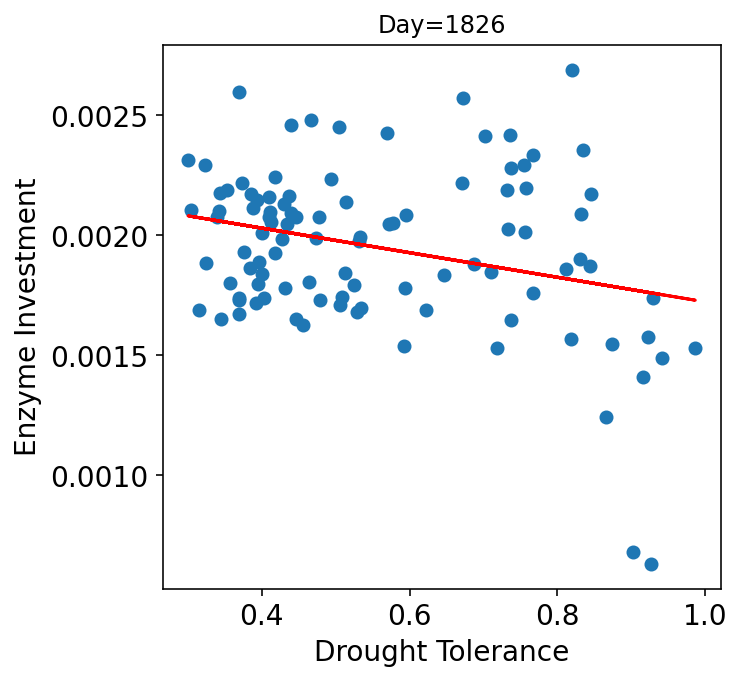

correlation efficient (-0.1929093064077363, 0.05448721088019284)
popt [-1.91509220e+03  1.22637179e+04  5.75214288e+06]
pcov [[ 6.18789268e+18 -3.96260285e+19 -1.85858181e+22]
 [-3.96260285e+19  2.53757170e+20  1.19019866e+23]
 [-1.85858181e+22  1.19019866e+23  5.58239537e+25]]


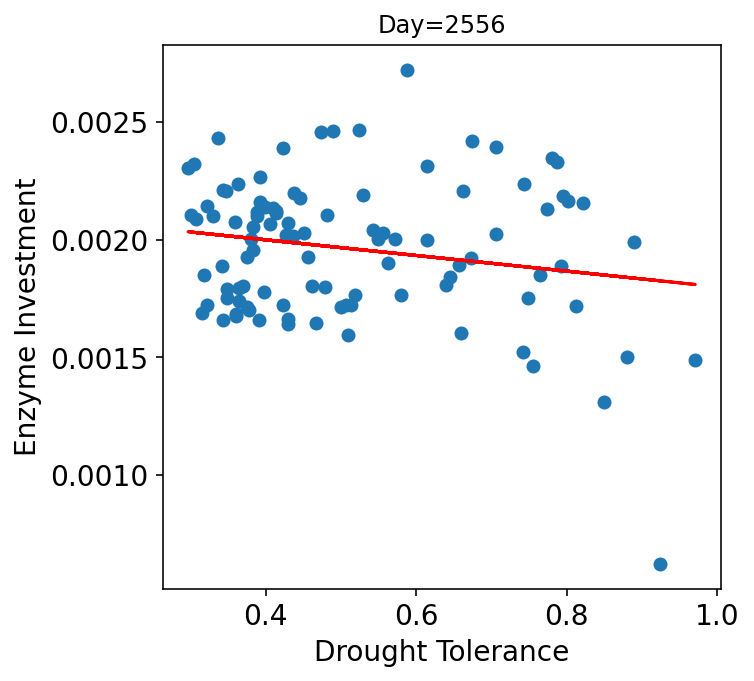

In [37]:
# first year after transplanting
for day in [5*365+1, 7*365+1]:
    
    
    drt = np.array([drt_de_su.iloc[day,:],
                    drt_sc_su.iloc[day,:],
                    drt_gr_su.iloc[day,:],
                    drt_pi_su.iloc[day,:],
                    drt_su_su.iloc[day,:]]).reshape(1,100)
    enz = np.array([enz_de_su.iloc[day,:],
                    enz_sc_su.iloc[day,:],
                    enz_gr_su.iloc[day,:],
                    enz_pi_su.iloc[day,:],
                    enz_su_su.iloc[day,:]]).reshape(1,100)
    
    # pearson corr
    print('correlation efficient',stats.pearsonr(drt[0,:],enz[0,:]))
    
    # concave curve fit
    popt,pcov = curve_fit(concave,drt[0,:],enz[0,:])
    print('popt',popt)
    print('pcov',pcov)
    
    # plotting
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    ax.set_title('Day='+str(day))
    ax.set_xlabel('Drought Tolerance',size=14)
    ax.set_ylabel('Enzyme Investment',size=14)
    
    ax.scatter(drt[0,:],enz[0,:])
    ax.plot(drt[0,:],concave(drt[0,:],popt[0],popt[1],popt[2]),c='r')
    #ax.plot(drt[0,:],linear(drt[0,:],popt[0],popt[1]),c='r')
    
    plt.show()

- desert: -0.39223981/5.435485701293259e-05; -0.39233003/5.412134087981657e-05

- scrubland:-0.38796052/6.657378250853349e-05; -0.43844969/5.052583709395032e-06

- grassland:-0.29999263/0.00242636173499401; -0.28522012/0.004023129002578351

- pine-oak:-0.24964975/0.0122483376093496;-0.23805901/0.017076483425888234

- subalpine: -0.28907715/0.0035344358900747555; -0.19290931/0.05448721088019284

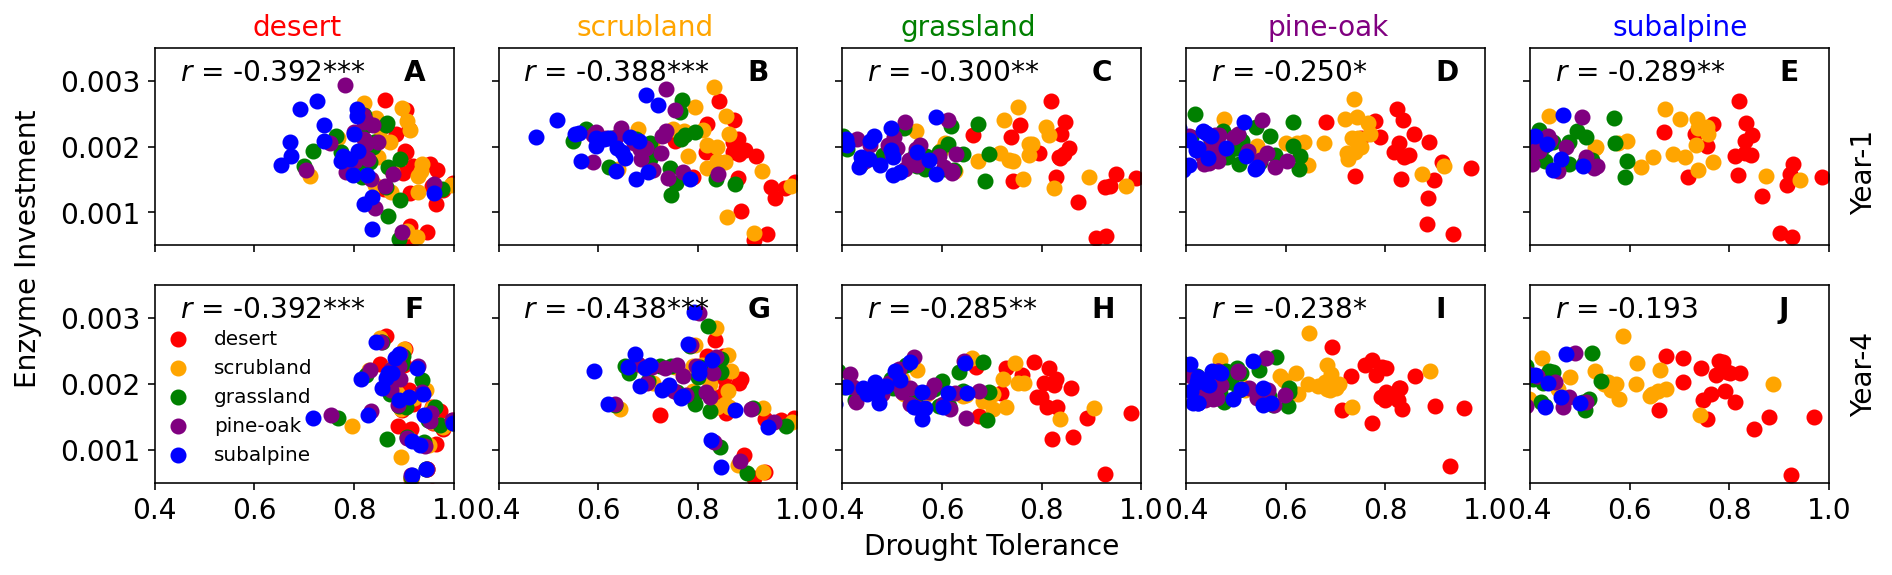

In [12]:
# first year after transplanting
#for day in [5*365+1, 7*365+1]:
    
day1=5*365+1
day2=7*365+1

fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,figsize=(15,4))

### desert
ax1.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=False)
ax1.set_xlim(0.4,1.0)
ax1.set_ylim(0.0005,0.0035)
#ax1.set_title('Day='+str(day))
#ax1.set_xlabel('Drought Tolerance',size=14)
#ax1.set_ylabel('Enzyme Investment',size=14)
ax1.scatter(drt_de_de.iloc[day1,:],enz_de_de.iloc[day1,:],color='red',     lw=2)
ax1.scatter(drt_sc_de.iloc[day1,:],enz_sc_de.iloc[day1,:],color='orange',  lw=2)
ax1.scatter(drt_gr_de.iloc[day1,:],enz_gr_de.iloc[day1,:],color='green',   lw=2)
ax1.scatter(drt_pi_de.iloc[day1,:],enz_pi_de.iloc[day1,:],color='purple',  lw=2)
ax1.scatter(drt_su_de.iloc[day1,:],enz_su_de.iloc[day1,:],color='blue',    lw=2)
ax1.text(0.45, 0.003, "$r$ = -0.392***", fontsize=14)
ax1.text(0.9, 0.003, "A", fontsize=14, weight='heavy')


ax6.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
ax6.set_xlim(0.4,1.0)
ax6.set_ylim(0.0005,0.0035)
#ax6.set_title('Day='+str(day))
#ax6.set_xlabel('Drought Tolerance',size=14)
#ax6.set_ylabel('Enzyme Investment',size=14)

ax6.scatter(drt_de_de.iloc[day2,:],enz_de_de.iloc[day2,:],color='red',     lw=2)
ax6.scatter(drt_sc_de.iloc[day2,:],enz_sc_de.iloc[day2,:],color='orange',  lw=2)
ax6.scatter(drt_gr_de.iloc[day2,:],enz_gr_de.iloc[day2,:],color='green',   lw=2)
ax6.scatter(drt_pi_de.iloc[day2,:],enz_pi_de.iloc[day2,:],color='purple',  lw=2)
ax6.scatter(drt_su_de.iloc[day2,:],enz_su_de.iloc[day2,:],color='blue',    lw=2)
ax6.text(0.45, 0.003, "$r$ = -0.392***", fontsize=14)
ax6.text(0.9, 0.003, "F", fontsize=14, weight='heavy')

ax6.legend(['desert','scrubland','grassland','pine-oak','subalpine'],
           loc='lower left',bbox_to_anchor=(-0.05,0.0),fontsize=10,frameon=False)



### scrubland
ax2.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=False,labelleft=False)
ax2.set_xlim(0.4,1.0)
ax2.set_ylim(0.0005,0.0035)
#ax2.set_title('Day='+str(day))
#ax2.set_xlabel('Drought Tolerance',size=14)
#ax2.set_ylabel('Enzyme Investment',size=14)

ax2.scatter(drt_de_sc.iloc[day1,:],enz_de_sc.iloc[day1,:],color='red',     lw=2)
ax2.scatter(drt_sc_sc.iloc[day1,:],enz_sc_sc.iloc[day1,:],color='orange',  lw=2)
ax2.scatter(drt_gr_sc.iloc[day1,:],enz_gr_sc.iloc[day1,:],color='green',   lw=2)
ax2.scatter(drt_pi_sc.iloc[day1,:],enz_pi_sc.iloc[day1,:],color='purple',  lw=2)
ax2.scatter(drt_su_sc.iloc[day1,:],enz_su_sc.iloc[day1,:],color='blue',    lw=2)
ax2.text(0.45, 0.003, "$r$ = -0.388***", fontsize=14)
ax2.text(0.9, 0.003, "B", fontsize=14, weight='heavy')

ax7.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=False)
ax7.set_xlim(0.4,1.0)
ax7.set_ylim(0.0005,0.0035)
#ax7.set_title('Day='+str(day))
#ax7.set_xlabel('Drought Tolerance',size=14)
#ax7.set_ylabel('Enzyme Investment',size=14)

ax7.scatter(drt_de_sc.iloc[day2,:],enz_de_sc.iloc[day2,:],color='red',     lw=2)
ax7.scatter(drt_sc_sc.iloc[day2,:],enz_sc_sc.iloc[day2,:],color='orange',  lw=2)
ax7.scatter(drt_gr_sc.iloc[day2,:],enz_gr_sc.iloc[day2,:],color='green',   lw=2)
ax7.scatter(drt_pi_sc.iloc[day2,:],enz_pi_sc.iloc[day2,:],color='purple',  lw=2)
ax7.scatter(drt_su_sc.iloc[day2,:],enz_su_sc.iloc[day2,:],color='blue',    lw=2)
ax7.text(0.45, 0.003, "$r$ = -0.438***", fontsize=14)
ax7.text(0.9, 0.003, "G", fontsize=14, weight='heavy')


### grassland
ax3.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=False,labelleft=False)
ax3.set_xlim(0.4,1.0)
ax3.set_ylim(0.0005,0.0035)
#ax3.set_title('Day='+str(day))
#ax3.set_xlabel('Drought Tolerance',size=14)
#ax3.set_ylabel('Enzyme Investment',size=14)

ax3.scatter(drt_de_gr.iloc[day1,:],enz_de_gr.iloc[day1,:],color='red',     lw=2)
ax3.scatter(drt_sc_gr.iloc[day1,:],enz_sc_gr.iloc[day1,:],color='orange',  lw=2)
ax3.scatter(drt_gr_gr.iloc[day1,:],enz_gr_gr.iloc[day1,:],color='green',   lw=2)
ax3.scatter(drt_pi_gr.iloc[day1,:],enz_pi_gr.iloc[day1,:],color='purple',  lw=2)
ax3.scatter(drt_su_gr.iloc[day1,:],enz_su_gr.iloc[day1,:],color='blue',    lw=2)
ax3.text(0.45, 0.003, "$r$ = -0.300**", fontsize=14)
ax3.text(0.9, 0.003, "C", fontsize=14, weight='heavy')


ax8.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=False)
ax8.set_xlim(0.4,1.0)
ax8.set_ylim(0.0005,0.0035)
#ax8.set_title('Day='+str(day))
ax8.set_xlabel('Drought Tolerance',size=14)
#ax8.set_ylabel('Enzyme Investment',size=14)

ax8.scatter(drt_de_gr.iloc[day2,:],enz_de_gr.iloc[day2,:],color='red',     lw=2)
ax8.scatter(drt_sc_gr.iloc[day2,:],enz_sc_gr.iloc[day2,:],color='orange',  lw=2)
ax8.scatter(drt_gr_gr.iloc[day2,:],enz_gr_gr.iloc[day2,:],color='green',   lw=2)
ax8.scatter(drt_pi_gr.iloc[day2,:],enz_pi_gr.iloc[day2,:],color='purple',  lw=2)
ax8.scatter(drt_su_gr.iloc[day2,:],enz_su_gr.iloc[day2,:],color='blue',    lw=2)
ax8.text(0.45, 0.003, "$r$ = -0.285**", fontsize=14)
ax8.text(0.9, 0.003, "H", fontsize=14, weight='heavy')


### pineoak
ax4.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=False,labelleft=False)
ax4.set_xlim(0.4,1.0)
ax4.set_ylim(0.0005,0.0035)
#ax4.set_title('Day='+str(day))
#ax4.set_xlabel('Drought Tolerance',size=14)
#ax4.set_ylabel('Enzyme Investment',size=14)

ax4.scatter(drt_de_pi.iloc[day1,:],enz_de_pi.iloc[day1,:],color='red',     lw=2)
ax4.scatter(drt_sc_pi.iloc[day1,:],enz_sc_pi.iloc[day1,:],color='orange',  lw=2)
ax4.scatter(drt_gr_pi.iloc[day1,:],enz_gr_pi.iloc[day1,:],color='green',   lw=2)
ax4.scatter(drt_pi_pi.iloc[day1,:],enz_pi_pi.iloc[day1,:],color='purple',  lw=2)
ax4.scatter(drt_su_pi.iloc[day1,:],enz_su_pi.iloc[day1,:],color='blue',    lw=2)
ax4.text(0.45, 0.003, "$r$ = -0.250*", fontsize=14)
ax4.text(0.9, 0.003, "D", fontsize=14, weight='heavy')


ax9.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=False)
ax9.set_xlim(0.4,1.0)
ax9.set_ylim(0.0005,0.0035)
#ax9.set_title('Day='+str(day))
#ax9.set_xlabel('Drought Tolerance',size=14)
#ax9.set_ylabel('Enzyme Investment',size=14)

ax9.scatter(drt_de_pi.iloc[day2,:],enz_de_pi.iloc[day2,:],color='red',     lw=2)
ax9.scatter(drt_sc_pi.iloc[day2,:],enz_sc_pi.iloc[day2,:],color='orange',  lw=2)
ax9.scatter(drt_gr_pi.iloc[day2,:],enz_gr_pi.iloc[day2,:],color='green',   lw=2)
ax9.scatter(drt_pi_pi.iloc[day2,:],enz_pi_pi.iloc[day2,:],color='purple',  lw=2)
ax9.scatter(drt_su_pi.iloc[day2,:],enz_su_pi.iloc[day2,:],color='blue',    lw=2)
ax9.text(0.45, 0.003, "$r$ = -0.238*", fontsize=14)
ax9.text(0.9, 0.003, "I", fontsize=14, weight='heavy')


### subalpine
ax5.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=False,labelleft=False)
ax5.set_xlim(0.4,1.0)
ax5.set_ylim(0.0005,0.0035)
#ax5.set_title('Day='+str(day))
#ax5.set_xlabel('Drought Tolerance',size=14)
#ax5.set_ylabel('Enzyme Investment',size=14)

ax5.scatter(drt_de_su.iloc[day1,:],enz_de_su.iloc[day1,:],color='red',     lw=2)
ax5.scatter(drt_sc_su.iloc[day1,:],enz_sc_su.iloc[day1,:],color='orange',  lw=2)
ax5.scatter(drt_gr_su.iloc[day1,:],enz_gr_su.iloc[day1,:],color='green',   lw=2)
ax5.scatter(drt_pi_su.iloc[day1,:],enz_pi_su.iloc[day1,:],color='purple',  lw=2)
ax5.scatter(drt_su_su.iloc[day1,:],enz_su_su.iloc[day1,:],color='blue',    lw=2)
ax5.text(0.45, 0.003, "$r$ = -0.289**", fontsize=14)
ax5.text(0.9, 0.003, "E", fontsize=14, weight='heavy')


ax10.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=False)
ax10.set_xlim(0.4,1.0)
ax10.set_ylim(0.0005,0.0035)
#ax10.set_title('Day='+str(day))
#ax10.set_xlabel('Drought Tolerance',size=14)
#ax10.set_ylabel('Enzyme Investment',size=14)
ax10.scatter(drt_de_su.iloc[day2,:],enz_de_su.iloc[day2,:],color='red',     lw=2)
ax10.scatter(drt_sc_su.iloc[day2,:],enz_sc_su.iloc[day2,:],color='orange',  lw=2)
ax10.scatter(drt_gr_su.iloc[day2,:],enz_gr_su.iloc[day2,:],color='green',   lw=2)
ax10.scatter(drt_pi_su.iloc[day2,:],enz_pi_su.iloc[day2,:],color='purple',  lw=2)
ax10.scatter(drt_su_su.iloc[day2,:],enz_su_su.iloc[day2,:],color='blue',    lw=2)
ax10.text(0.45, 0.003, "$r$ = -0.193", fontsize=14)
ax10.text(0.9, 0.003, "J", fontsize=14, weight='heavy')


plt.figtext(0.17,0.90, 'desert',   fontsize=14, weight='normal',c='red',   rotation=0)
plt.figtext(0.32,0.90, 'scrubland',fontsize=14, weight='normal',c='orange',rotation=0)
plt.figtext(0.47,0.90, 'grassland',fontsize=14, weight='normal',c='green', rotation=0)
plt.figtext(0.64,0.90, 'pine-oak', fontsize=14, weight='normal',c='purple',rotation=0)
plt.figtext(0.80,0.90, 'subalpine',fontsize=14, weight='normal',c='blue',  rotation=0)

plt.figtext(0.06,0.30, 'Enzyme Investment',fontsize=14, weight='normal',c='k',  rotation=90)

plt.figtext(0.91,0.60, 'Year-1',fontsize=14, weight='normal',c='k',  rotation=90)
plt.figtext(0.91,0.25, 'Year-4',fontsize=14, weight='normal',c='k',  rotation=90)

plt.subplots_adjust(wspace=0.15)

#plt.savefig('figures/trait_correlation.pdf',bbox_inches='tight')

plt.show()

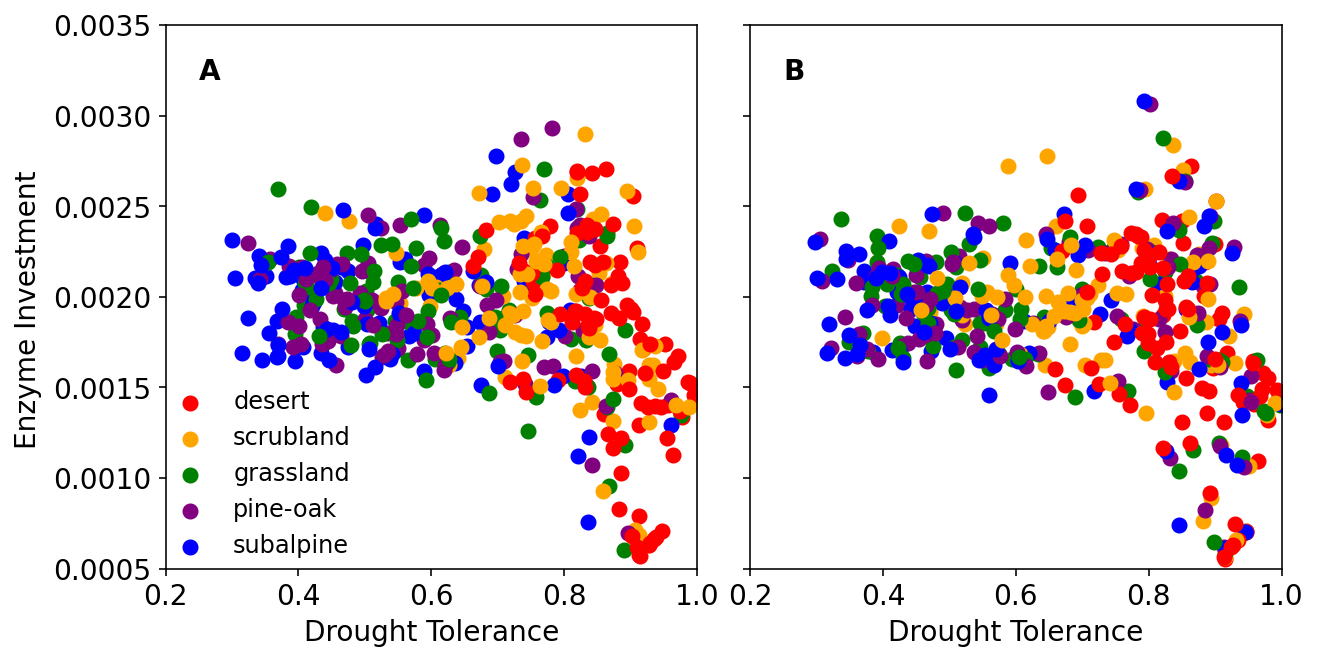

In [6]:
# first year after transplanting
#for day in [5*365+1, 7*365+1]:
    
day1=5*365+1
day2=7*365+1

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

### desert
ax1.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
ax1.set_xlim(0.2,1.0)
ax1.set_ylim(0.0005,0.0035)
#ax1.set_title('Day='+str(day))
#ax1.set_xlabel('Drought Tolerance',size=14)
#ax1.set_ylabel('Enzyme Investment',size=14)
ax1.scatter(drt_de_de.iloc[day1,:],enz_de_de.iloc[day1,:],color='red',     lw=2)
ax1.scatter(drt_sc_de.iloc[day1,:],enz_sc_de.iloc[day1,:],color='orange',  lw=2)
ax1.scatter(drt_gr_de.iloc[day1,:],enz_gr_de.iloc[day1,:],color='green',   lw=2)
ax1.scatter(drt_pi_de.iloc[day1,:],enz_pi_de.iloc[day1,:],color='purple',  lw=2)
ax1.scatter(drt_su_de.iloc[day1,:],enz_su_de.iloc[day1,:],color='blue',    lw=2)
#ax1.text(0.45, 0.003, "$r$ = -0.392***", fontsize=14)
ax1.text(0.25, 0.0032, "A", fontsize=14, weight='heavy')

ax1.legend(['desert','scrubland','grassland','pine-oak','subalpine'],
           loc='lower left',bbox_to_anchor=(-0.04,-0.02),fontsize=12,frameon=False)


ax2.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
ax2.set_xlim(0.2,1.0)
ax2.set_ylim(0.0005,0.0035)
#ax6.set_title('Day='+str(day))
#ax6.set_xlabel('Drought Tolerance',size=14)
#ax6.set_ylabel('Enzyme Investment',size=14)
ax2.scatter(drt_de_de.iloc[day2,:],enz_de_de.iloc[day2,:],color='red',     lw=2)
ax2.scatter(drt_sc_de.iloc[day2,:],enz_sc_de.iloc[day2,:],color='orange',  lw=2)
ax2.scatter(drt_gr_de.iloc[day2,:],enz_gr_de.iloc[day2,:],color='green',   lw=2)
ax2.scatter(drt_pi_de.iloc[day2,:],enz_pi_de.iloc[day2,:],color='purple',  lw=2)
ax2.scatter(drt_su_de.iloc[day2,:],enz_su_de.iloc[day2,:],color='blue',    lw=2)
#ax2.text(0.45, 0.003, "$r$ = -0.392***", fontsize=14)
ax2.text(0.25, 0.0032, "B", fontsize=14, weight='heavy')


### scrubland
ax1.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=True)
ax1.set_xlim(0.2,1.0)
ax1.set_ylim(0.0005,0.0035)
#ax2.set_title('Day='+str(day))
#ax2.set_xlabel('Drought Tolerance',size=14)
#ax2.set_ylabel('Enzyme Investment',size=14)

ax1.scatter(drt_de_sc.iloc[day1,:],enz_de_sc.iloc[day1,:],color='red',     lw=2)
ax1.scatter(drt_sc_sc.iloc[day1,:],enz_sc_sc.iloc[day1,:],color='orange',  lw=2)
ax1.scatter(drt_gr_sc.iloc[day1,:],enz_gr_sc.iloc[day1,:],color='green',   lw=2)
ax1.scatter(drt_pi_sc.iloc[day1,:],enz_pi_sc.iloc[day1,:],color='purple',  lw=2)
ax1.scatter(drt_su_sc.iloc[day1,:],enz_su_sc.iloc[day1,:],color='blue',    lw=2)
# ax1.text(0.45, 0.003, "$r$ = -0.388***", fontsize=14)
# ax1.text(0.9, 0.003, "B", fontsize=14, weight='heavy')

ax2.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=False)
ax2.set_xlim(0.2,1.0)
ax2.set_ylim(0.0005,0.0035)
#ax7.set_title('Day='+str(day))
#ax7.set_xlabel('Drought Tolerance',size=14)
#ax7.set_ylabel('Enzyme Investment',size=14)

ax2.scatter(drt_de_sc.iloc[day2,:],enz_de_sc.iloc[day2,:],color='red',     lw=2)
ax2.scatter(drt_sc_sc.iloc[day2,:],enz_sc_sc.iloc[day2,:],color='orange',  lw=2)
ax2.scatter(drt_gr_sc.iloc[day2,:],enz_gr_sc.iloc[day2,:],color='green',   lw=2)
ax2.scatter(drt_pi_sc.iloc[day2,:],enz_pi_sc.iloc[day2,:],color='purple',  lw=2)
ax2.scatter(drt_su_sc.iloc[day2,:],enz_su_sc.iloc[day2,:],color='blue',    lw=2)
# ax2.text(0.45, 0.003, "$r$ = -0.438***", fontsize=14)
# ax2.text(0.9, 0.003, "G", fontsize=14, weight='heavy')


### grassland
ax1.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=False,labelleft=False)
ax1.set_xlim(0.2,1.0)
ax1.set_ylim(0.0005,0.0035)
#ax3.set_title('Day='+str(day))
#ax3.set_xlabel('Drought Tolerance',size=14)
#ax3.set_ylabel('Enzyme Investment',size=14)

ax1.scatter(drt_de_gr.iloc[day1,:],enz_de_gr.iloc[day1,:],color='red',     lw=2)
ax1.scatter(drt_sc_gr.iloc[day1,:],enz_sc_gr.iloc[day1,:],color='orange',  lw=2)
ax1.scatter(drt_gr_gr.iloc[day1,:],enz_gr_gr.iloc[day1,:],color='green',   lw=2)
ax1.scatter(drt_pi_gr.iloc[day1,:],enz_pi_gr.iloc[day1,:],color='purple',  lw=2)
ax1.scatter(drt_su_gr.iloc[day1,:],enz_su_gr.iloc[day1,:],color='blue',    lw=2)
# ax1.text(0.45, 0.003, "$r$ = -0.300**", fontsize=14)
# ax1.text(0.9, 0.003, "C", fontsize=14, weight='heavy')


ax2.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=False)
ax2.set_xlim(0.2,1.0)
ax2.set_ylim(0.0005,0.0035)
#ax8.set_title('Day='+str(day))
ax2.set_xlabel('Drought Tolerance',size=14)
#ax8.set_ylabel('Enzyme Investment',size=14)

ax2.scatter(drt_de_gr.iloc[day2,:],enz_de_gr.iloc[day2,:],color='red',     lw=2)
ax2.scatter(drt_sc_gr.iloc[day2,:],enz_sc_gr.iloc[day2,:],color='orange',  lw=2)
ax2.scatter(drt_gr_gr.iloc[day2,:],enz_gr_gr.iloc[day2,:],color='green',   lw=2)
ax2.scatter(drt_pi_gr.iloc[day2,:],enz_pi_gr.iloc[day2,:],color='purple',  lw=2)
ax2.scatter(drt_su_gr.iloc[day2,:],enz_su_gr.iloc[day2,:],color='blue',    lw=2)
# ax2.text(0.45, 0.003, "$r$ = -0.285**", fontsize=14)
# ax2.text(0.9, 0.003, "H", fontsize=14, weight='heavy')


### pineoak
ax1.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=False,labelleft=False)
ax1.set_xlim(0.2,1.0)
ax1.set_ylim(0.0005,0.0035)
#ax4.set_title('Day='+str(day))
#ax4.set_xlabel('Drought Tolerance',size=14)
#ax4.set_ylabel('Enzyme Investment',size=14)

ax1.scatter(drt_de_pi.iloc[day1,:],enz_de_pi.iloc[day1,:],color='red',     lw=2)
ax1.scatter(drt_sc_pi.iloc[day1,:],enz_sc_pi.iloc[day1,:],color='orange',  lw=2)
ax1.scatter(drt_gr_pi.iloc[day1,:],enz_gr_pi.iloc[day1,:],color='green',   lw=2)
ax1.scatter(drt_pi_pi.iloc[day1,:],enz_pi_pi.iloc[day1,:],color='purple',  lw=2)
ax1.scatter(drt_su_pi.iloc[day1,:],enz_su_pi.iloc[day1,:],color='blue',    lw=2)
# ax1.text(0.45, 0.003, "$r$ = -0.250*", fontsize=14)
# ax1.text(0.9, 0.003, "D", fontsize=14, weight='heavy')


ax2.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=False)
ax2.set_xlim(0.2,1.0)
ax2.set_ylim(0.0005,0.0035)
#ax9.set_title('Day='+str(day))
#ax9.set_xlabel('Drought Tolerance',size=14)
#ax9.set_ylabel('Enzyme Investment',size=14)

ax2.scatter(drt_de_pi.iloc[day2,:],enz_de_pi.iloc[day2,:],color='red',     lw=2)
ax2.scatter(drt_sc_pi.iloc[day2,:],enz_sc_pi.iloc[day2,:],color='orange',  lw=2)
ax2.scatter(drt_gr_pi.iloc[day2,:],enz_gr_pi.iloc[day2,:],color='green',   lw=2)
ax2.scatter(drt_pi_pi.iloc[day2,:],enz_pi_pi.iloc[day2,:],color='purple',  lw=2)
ax2.scatter(drt_su_pi.iloc[day2,:],enz_su_pi.iloc[day2,:],color='blue',    lw=2)
# ax2.text(0.45, 0.003, "$r$ = -0.238*", fontsize=14)
# ax2.text(0.9, 0.003, "I", fontsize=14, weight='heavy')


### subalpine
ax1.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=True)
ax1.set_xlim(0.2,1.0)
ax1.set_ylim(0.0005,0.0035)
#ax5.set_title('Day='+str(day))
ax1.set_xlabel('Drought Tolerance',size=14)
#ax5.set_ylabel('Enzyme Investment',size=14)

ax1.scatter(drt_de_su.iloc[day1,:],enz_de_su.iloc[day1,:],color='red',     lw=2)
ax1.scatter(drt_sc_su.iloc[day1,:],enz_sc_su.iloc[day1,:],color='orange',  lw=2)
ax1.scatter(drt_gr_su.iloc[day1,:],enz_gr_su.iloc[day1,:],color='green',   lw=2)
ax1.scatter(drt_pi_su.iloc[day1,:],enz_pi_su.iloc[day1,:],color='purple',  lw=2)
ax1.scatter(drt_su_su.iloc[day1,:],enz_su_su.iloc[day1,:],color='blue',    lw=2)
# ax1.text(0.45, 0.003, "$r$ = -0.289**", fontsize=14)
# ax1.text(0.9, 0.003, "E", fontsize=14, weight='heavy')


ax2.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=False)
ax2.set_xlim(0.2,1.0)
ax2.set_ylim(0.0005,0.0035)
#ax10.set_title('Day='+str(day))
#ax10.set_xlabel('Drought Tolerance',size=14)
#ax10.set_ylabel('Enzyme Investment',size=14)
ax2.scatter(drt_de_su.iloc[day2,:],enz_de_su.iloc[day2,:],color='red',     lw=2)
ax2.scatter(drt_sc_su.iloc[day2,:],enz_sc_su.iloc[day2,:],color='orange',  lw=2)
ax2.scatter(drt_gr_su.iloc[day2,:],enz_gr_su.iloc[day2,:],color='green',   lw=2)
ax2.scatter(drt_pi_su.iloc[day2,:],enz_pi_su.iloc[day2,:],color='purple',  lw=2)
ax2.scatter(drt_su_su.iloc[day2,:],enz_su_su.iloc[day2,:],color='blue',    lw=2)
#ax2.text(0.45, 0.003, "$r$ = -0.193", fontsize=14)
#ax2.text(0.9, 0.003, "J", fontsize=14, weight='heavy')


# plt.figtext(0.17,0.90, 'desert',   fontsize=14, weight='normal',c='red',   rotation=0)
# plt.figtext(0.32,0.90, 'scrubland',fontsize=14, weight='normal',c='orange',rotation=0)
# plt.figtext(0.47,0.90, 'grassland',fontsize=14, weight='normal',c='green', rotation=0)
# plt.figtext(0.64,0.90, 'pine-oak', fontsize=14, weight='normal',c='purple',rotation=0)
# plt.figtext(0.80,0.90, 'subalpine',fontsize=14, weight='normal',c='blue',  rotation=0)

plt.figtext(0.02,0.30, 'Enzyme Investment',fontsize=14, weight='normal',c='k',  rotation=90)

# plt.figtext(0.91,0.60, 'Year-1',fontsize=14, weight='normal',c='k',  rotation=90)
# plt.figtext(0.91,0.25, 'Year-4',fontsize=14, weight='normal',c='k',  rotation=90)

plt.subplots_adjust(wspace=0.1)

plt.savefig('figures/pooled_trait_correlation.pdf',bbox_inches='tight')

plt.show()

### Perform LOWESS Smoothing 

Reference https://www.statsmodels.org/stable/examples/notebooks/generated/lowess.html

### Variance partitioning

data derived from ANOVA of decomposition, enzyme, and drought tolerance trait in R

In [3]:
year1 = [0.1760132, 0.4646893,0.0194999, 0.3397976]
year4 = [0.03842806,0.6858736,0.01465909,0.2610392]
decom=np.array([year1,year4])

y1_enz = [0.04374423,0.03015943,0.008806626,0.9172897]
y4_enz = [0.01155115,0.07556813,0.004811448,0.9080693]
enz = np.array([y1_enz,y4_enz])


y1_drt = [0.4357417,0.3399117,0.06458667,0.15976]
y4_drt = [0.1845083,0.5924159,0.08612304,0.1369528]
drt = np.array([y1_drt, y4_drt])

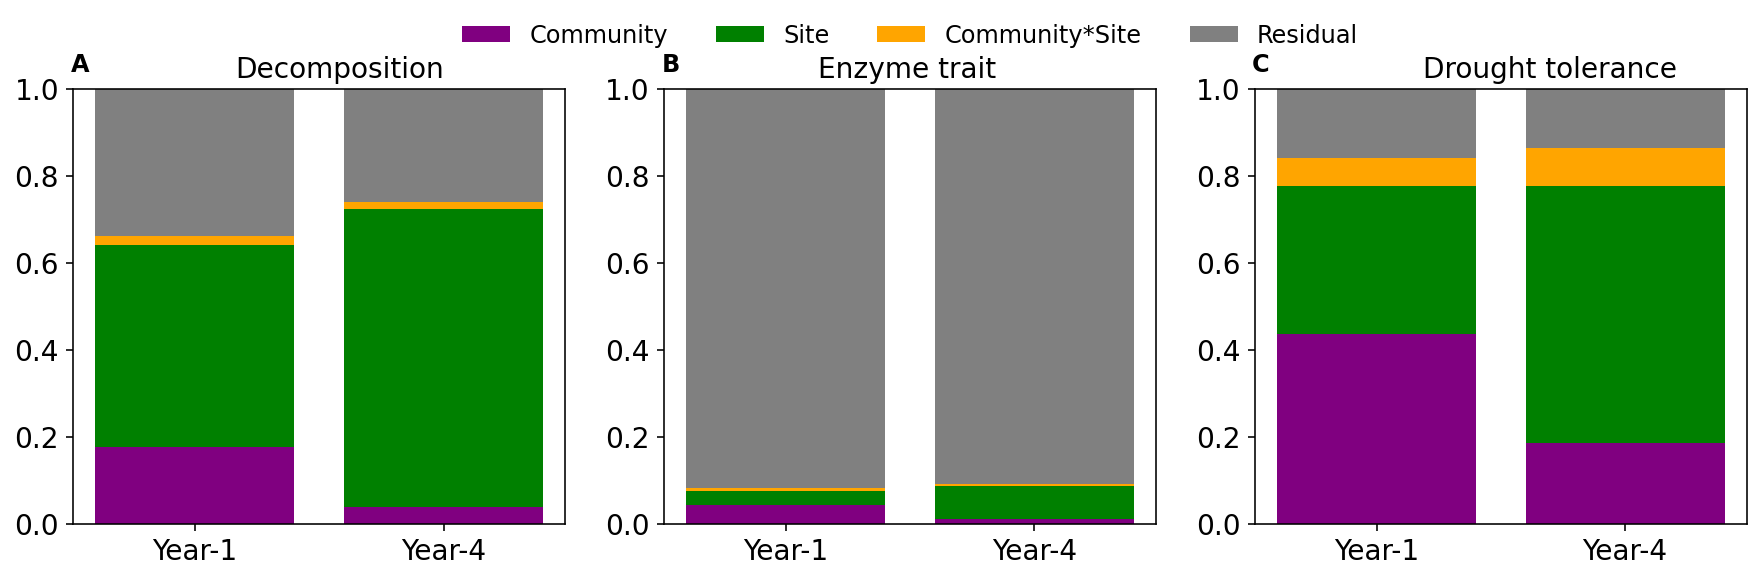

In [5]:
index = ['Year-1','Year-4']

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))

ax1.bar(index,decom[:,0],color='purple')
ax1.bar(index,decom[:,1],bottom=decom[:,0],color='green')
ax1.bar(index,decom[:,2],bottom=decom[:,0]+decom[:,1],color='orange')
ax1.bar(index,decom[:,3],bottom=decom[:,0]+decom[:,1]+decom[:,2],color='grey')
ax1.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=True)
ax1.text(-0.5,1.04,"A",fontsize=12,weight='heavy')
ax1.set_ylim(0,1)

ax2.bar(index,enz[:,0],color='purple')
ax2.bar(index,enz[:,1],bottom=enz[:,0],color='green')
ax2.bar(index,enz[:,2],bottom=enz[:,0]+enz[:,1],color='orange')
ax2.bar(index,enz[:,3],bottom=enz[:,0]+enz[:,1]+enz[:,2],color='grey')
ax2.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=True)
ax2.legend(['Community','Site','Community*Site','Residual'],
           loc='upper center',ncol=4,bbox_to_anchor=(0.5,1.2),
           fontsize=12,frameon=False)
ax2.text(-0.5,1.04,"B",fontsize=12,weight='heavy')
ax2.set_ylim(0,1)

ax3.bar(index,drt[:,0],color='purple')
ax3.bar(index,drt[:,1],bottom=drt[:,0],color='green')
ax3.bar(index,drt[:,2],bottom=drt[:,0]+drt[:,1],color='orange')
ax3.bar(index,drt[:,3],bottom=drt[:,0]+drt[:,1]+drt[:,2],color='grey')
ax3.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True,labelleft=True)
ax3.text(-0.5,1.04,"C",fontsize=12,weight='heavy')
ax3.set_ylim(0,1)

plt.figtext(0.20,0.90, 'Decomposition',   fontsize=14, weight='normal',c='k',   rotation=0)
plt.figtext(0.47,0.90, 'Enzyme trait',    fontsize=14, weight='normal',c='k',rotation=0)
plt.figtext(0.75,0.90, 'Drought tolerance',fontsize=14, weight='normal',c='k', rotation=0)

plt.subplots_adjust(wspace=0.2)

plt.savefig('figures/relative_contribution.pdf',bbox_inches='tight')

plt.show()

### Model validation

Validate the model built on data of transplant simulations with data from the simulations across the gradient before the transplant.

In [3]:
model_validation = pd.read_csv('model_validation.csv', index_col=0)
model_validation.head()

,Unnamed: 1,decomp_predic
1,255.79690,307.038498
2,259.80598,261.931796
3,288.09282,339.706791
4,307.37382,366.903042
5,255.90998,323.725314


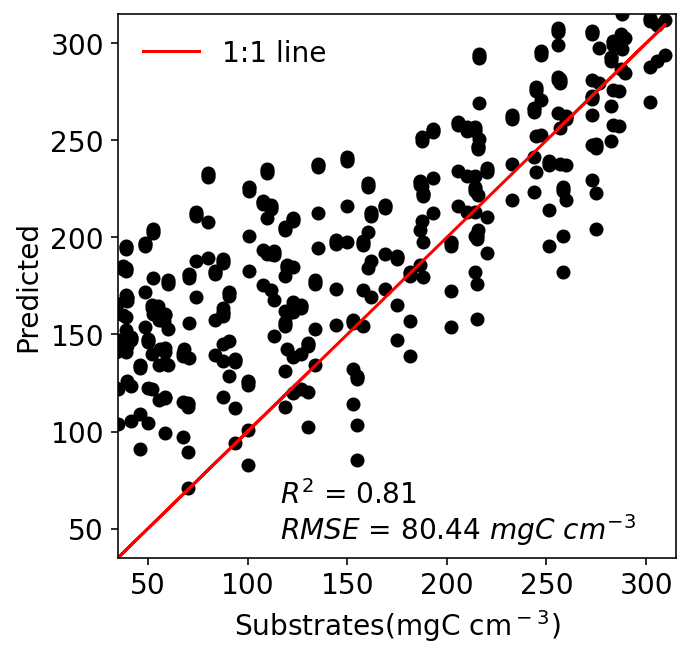

In [37]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(model_validation.iloc[:,0],model_validation.iloc[:,1],c='k')
ax.plot(model_validation.iloc[:,0],model_validation.iloc[:,0],c='r')
ax.legend(['1:1 line'],frameon=False,fontsize=14)

ax.set_xlim(35,315)
ax.set_ylim(35,315)
ax.set_xlabel('Substrates(mgC cm$^-$$^3$)',fontsize=14)
ax.set_ylabel('Predicted', fontsize=14)

ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)

plt.figtext(0.35,0.20, '$\it{R^2}$ = 0.81',fontsize=14, weight='normal',c='k')
plt.figtext(0.35,0.15, '$\it{RMSE}$ = 80.44 $\it{mgC}$ $\it{cm^{-3}}$',fontsize=14, weight='normal',c='k')

plt.show()

## Mass loss data from Glassman et al. 2018 PNAS

https://github.com/stevenallison/UCIClimateExperiment

In [8]:
mass_loss_pnas = pd.read_csv('MassLossT2_Steve.csv', index_col=0)
mass_loss1_pnas = pd.read_csv('MassLossT1_Steve.csv', index_col=0)

mass_loss_pnas.head()

,SampleID,Site,LitterOrigin,MicrobialOrigin,Replicate,Timepoint,Date,Collection,FullBag,EmptyBag,...,DryLitterPlusEnvWeight,HyphaeWetWeight,Sample,Type,Rep,DryToWet,Initial.Mass,Wet.Mass.Rem,Wet.Mass.Rem2,Mass.loss
201,1C02,1:Desert,Grassland,Sterile,2,2,10/25/16,10/24/16,15.830,7.740,...,1.96,0.190,1C,C,2,0.299320,5,12.020,8.090,28.043537
202,1C03,1:Desert,Grassland,Sterile,3,2,10/25/16,10/24/16,21.290,7.700,...,1.58,0.210,1C,C,3,0.250000,5,13.470,13.590,32.650000
203,1C04,1:Desert,Grassland,Sterile,4,2,10/25/16,10/24/16,16.920,7.840,...,2.20,0.190,1C,C,4,0.495455,5,7.820,9.080,22.510909
204,1D01,1:Desert,Grassland,1:Desert,1,2,10/25/16,10/24/16,15.390,8.070,...,2.20,0.178,1D,D,1,0.540936,5,7.140,7.320,22.754386
205,1D02,1:Desert,Grassland,1:Desert,2,2,10/25/16,10/24/16,18.278,8.381,...,1.95,0.180,1D,D,2,0.406764,5,9.659,9.897,21.421298


In [9]:
pnas_de = mass_loss_pnas[mass_loss_pnas.loc[:,'Site'] == "1:Desert"]
pnas_sc = mass_loss_pnas[mass_loss_pnas.loc[:,'Site'] == "2:Scrubland"]
pnas_gr = mass_loss_pnas[mass_loss_pnas.loc[:,'Site'] == "3:Grassland"]
pnas_pi = mass_loss_pnas[mass_loss_pnas.loc[:,'Site'] == "4:Pine-Oak"]
pnas_su = mass_loss_pnas[mass_loss_pnas.loc[:,'Site'] == "5:Subalpine"]


pnas_mean2 = [
    
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
    
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
]

In [10]:
pnas_de = mass_loss1_pnas[mass_loss1_pnas.loc[:,'Site'] == "1:Desert"]
pnas_sc = mass_loss1_pnas[mass_loss1_pnas.loc[:,'Site'] == "2:Scrubland"]
pnas_gr = mass_loss1_pnas[mass_loss1_pnas.loc[:,'Site'] == "3:Grassland"]
pnas_pi = mass_loss1_pnas[mass_loss1_pnas.loc[:,'Site'] == "4:Pine-Oak"]
pnas_su = mass_loss1_pnas[mass_loss1_pnas.loc[:,'Site'] == "5:Subalpine"]


pnas_mean1 = [
    
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_de[pnas_de['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
    
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_sc[pnas_sc['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_gr[pnas_gr['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_pi[pnas_pi['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '1:Desert']["Mass.loss"]),
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '2:Scrubland']["Mass.loss"]),
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '3:Grassland']["Mass.loss"]),
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '4:Pine-Oak']["Mass.loss"]),
    np.mean(pnas_su[pnas_su['MicrobialOrigin']== '5:Subalpine']["Mass.loss"]),
    
]

In [11]:
pnas_mean1

[26.653806335298675,
 23.784864380170447,
 23.74853843858263,
 21.989987339133553,
 25.4057188389216,
 32.101347891798525,
 31.248021289787374,
 38.72170646745673,
 32.26395829789165,
 28.8804045407637,
 39.45375864600339,
 50.981566507371895,
 39.90744119579098,
 47.439786206992096,
 44.874884634069474,
 42.021513499798274,
 42.36014012982225,
 43.39994689201788,
 39.9639480183692,
 38.96096273291928,
 39.35498571220085,
 40.624924501345,
 40.06861180309785,
 39.80933233156573,
 36.50732527512438]

In [13]:
stats.pearsonr(model_mean1,pnas_mean1)

(0.27984240799236476, 0.17547162296840924)

In [14]:
r2_score(model_mean1,pnas_mean1)

-1.262932730546416

In [15]:
stats.pearsonr(model_mean2,pnas_mean2)

(0.5575937983683851, 0.0037802202493929416)

In [16]:
r2_score(model_mean2,pnas_mean2)

0.05785819531233527

In [17]:
stats.pearsonr(model_mean1+model_mean2,pnas_mean1+pnas_mean2)

(0.49308339210464136, 0.0002746498806068273)

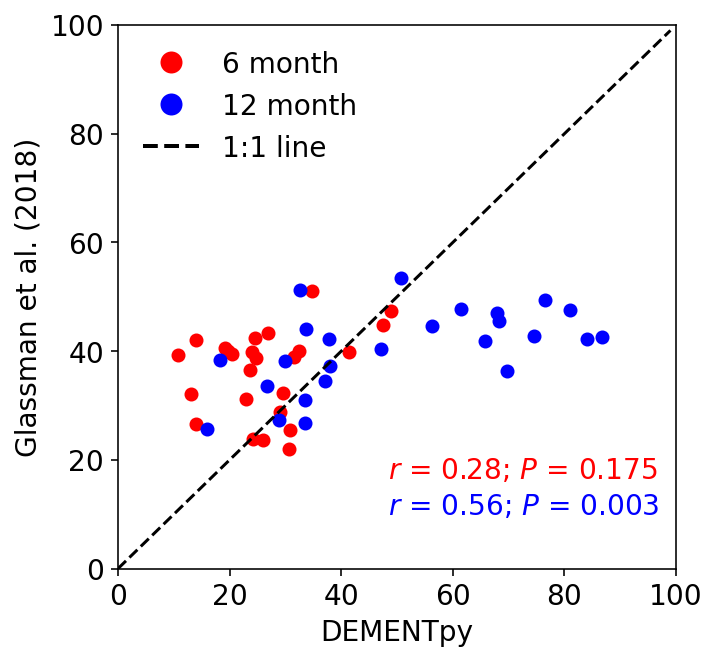

In [22]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.scatter(model_mean1,pnas_mean1,c='red')  # 6 month
ax.scatter(model_mean2,pnas_mean2,c='blue') # 12 month
ax.plot(np.arange(0,100),np.arange(0,100),c='k',linestyle='--') # 1:1 line

ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_xlabel('DEMENTpy',fontsize=14)
ax.set_ylabel('Glassman et al. (2018)', fontsize=14)

ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)


#legend
red =  Line2D([0], [0], marker='o', color='w', label='6 month', markerfacecolor='red',  markersize=12)
blue = Line2D([0], [0], marker='o', color='w', label='12 month', markerfacecolor='blue', markersize=12)
black= Line2D([0], [0], color='k', lw=2, linestyle='--',label='1:1 line')
ax.legend(handles=[red,blue,black],fontsize=14, frameon=False)


plt.figtext(0.50,0.25, '$\it{r}$ = 0.28; $\it{P}$ = 0.175 ',fontsize=14, weight='normal',c='red')
plt.figtext(0.50,0.20, '$\it{r}$ = 0.56; $\it{P}$ = 0.003', fontsize=14, weight='normal',c='blue')


plt.savefig('figures/model_data_comparison.pdf',bbox_inches='tight')


plt.show()